In [2]:
import pandas as pd
import numpy as np


In [ ]:

pip install transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Part 1: Data overview and preprocessing


## General overview

In [ ]:
df = pd.read_excel('electronika_03_04.xlsx')
df.head()

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,...,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID
0,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,35554.0
1,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,3520.0,0.0,3520.0,NaN,NaN,NaN,Услуги/Страхование техники/Гарант +/,13.0,16686.0
2,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,35999.0,0.0,35999.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/Smart теле...",13.0,95567.0
3,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,490.0,0.0,490.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,29329.0
4,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,2.0,3990.0,0.0,7980.0,NaN,NaN,NaN,Установка и настройка техники/Установка и наст...,13.0,2748.0


In [ ]:
df.describe()

,месяц,Status_ID,OneClick,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Quant,RowPrice,RowDiscount,RowSum,Week,Nom_ID
count,357036.000000,357036.000000,357036.000000,357036.000000,357016.000000,357016.000000,357016.000000,357016.000000,3.570160e+05,357016.000000,357016.000000,357016.000000,357016.000000,357016.000000,357016.000000
mean,201603.484195,15.082462,0.086767,3574.291296,11932.500419,186.905295,12120.271704,1.679418,1.168068e+06,1.037225,5121.540500,81.655385,5150.462934,12.876098,89530.844130
std,0.499751,1.723985,0.281494,1257.634055,17900.956758,875.940145,18178.124191,0.966818,5.310275e+04,1.050080,10732.829115,551.846595,10947.850286,2.593267,85293.774418
min,201603.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.151000e+04,0.000000,0.000000,-4375.000000,0.000000,9.000000,0.000000
25%,201603.000000,14.000000,0.000000,3088.000000,2369.000000,0.000000,2340.000000,1.000000,1.157790e+06,1.000000,0.000000,0.000000,0.000000,11.000000,35554.000000
50%,201603.000000,14.000000,0.000000,3458.000000,6090.000000,0.000000,6099.000000,2.000000,1.157790e+06,1.000000,599.000000,0.000000,599.000000,13.000000,35554.000000
75%,201604.000000,17.000000,0.000000,3668.000000,14850.000000,0.000000,14998.000000,2.000000,1.195240e+06,1.000000,5619.000000,0.000000,5660.000000,15.000000,141062.000000
max,201604.000000,26.000000,1.000000,9999.000000,888740.000000,40011.000000,888740.000000,41.000000,1.263264e+06,285.000000,676240.000000,56090.000000,676240.000000,17.000000,366186.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357036 entries, 0 to 357035
Data columns (total 37 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Order_ID      357036 non-null  object        
 1   Email_new     357036 non-null  object        
 2   Phone_new     357036 non-null  object        
 3   Source        357036 non-null  object        
 4   OrderDate     357036 non-null  datetime64[ns]
 5   время         357036 non-null  object        
 6   месяц         357036 non-null  int64         
 7   ChangeDate    357036 non-null  object        
 8   DeliveryDate  357036 non-null  object        
 9   PaymentDate   357036 non-null  object        
 10  Status        357036 non-null  object        
 11  Status_ID     357036 non-null  int64         
 12  OneClick      357036 non-null  int64         
 13  CancelReason  126168 non-null  object        
 14  Actions       95540 non-null   object        
 15  DeliveryType  348

In [ ]:
df.isnull().sum(axis=0)

Order_ID             0
Email_new            0
Phone_new            0
Source               0
OrderDate            0
время                0
месяц                0
ChangeDate           0
DeliveryDate         0
PaymentDate          0
Status               0
Status_ID            0
OneClick             0
CancelReason    230868
Actions         261496
DeliveryType      8285
PaymentType          0
Region               2
Area              1631
Store_ID             0
FullSum             20
Discount            20
IM_Rozn_Sum         20
Row_ID              20
Articul             20
Nom_Name            58
NomGroup            20
Quant               20
RowPrice            20
RowDiscount         20
RowSum              20
Brand           166141
TN              166101
TK              166101
NomFullPath         20
Week                20
Nom_ID              20
dtype: int64

In [ ]:
df.nunique()

Order_ID        166794
Email_new        99284
Phone_new       123135
Source               4
OrderDate           61
время            58549
месяц                2
ChangeDate      155189
DeliveryDate       100
PaymentDate     105118
Status              15
Status_ID           15
OneClick             2
CancelReason        34
Actions             41
DeliveryType         2
PaymentType          7
Region              73
Area                61
Store_ID           167
FullSum          15995
Discount          1920
IM_Rozn_Sum      20622
Row_ID              41
Articul          26930
Nom_Name         26888
NomGroup           849
Quant               43
RowPrice          9601
RowDiscount       2006
RowSum           12377
Brand             1179
TN                  17
TK                 112
NomFullPath        878
Week                 9
Nom_ID           26928
dtype: int64

Видим что нет уникального айди, так-же есть пропущенные значения, в основном в колонке Actions.



## General preprocessing

In [ ]:
df_copy = df

In [ ]:
df.drop_duplicates()

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,...,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID
0,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,35554.0
1,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,3520.0,0.0,3520.0,NaN,NaN,NaN,Услуги/Страхование техники/Гарант +/,13.0,16686.0
2,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,35999.0,0.0,35999.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/Smart теле...",13.0,95567.0
3,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,490.0,0.0,490.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,29329.0
4,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,...,2.0,3990.0,0.0,7980.0,NaN,NaN,NaN,Установка и настройка техники/Установка и наст...,13.0,2748.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357031,75511562_BX,0,0,Терминал,2016-03-18,12:56:40.000,201603,2016-03-18 15:56:15.000,2016-03-18 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,1.0,0.0,1.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/3D телевиз...",11.0,92697.0
357032,75511563_BX,0,0,Терминал,2016-03-15,16:43:15.000,201603,2016-03-20 09:20:45.000,2016-03-22 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Услуги/Доставка/,11.0,35554.0
357033,75511563_BX,0,0,Терминал,2016-03-15,16:43:15.000,201603,2016-03-20 09:20:45.000,2016-03-22 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,26990.0,0.0,26990.0,Philips,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",11.0,111803.0
357034,75511567_BX,0,0,Терминал,2016-03-15,16:47:21.000,201603,2016-03-20 09:20:46.000,2016-03-22 00:00:00.000,1900-01-01 00:00:00.000,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Услуги/Доставка/,11.0,35554.0


In [ ]:
df.shape

(357036, 37)

In [ ]:
df['ID_Email_phone'] = df.apply(lambda row: str(row['Email_new']) + str(row['Phone_new']), axis=1)

In [ ]:
df = df.drop(df[df['ID_Email_phone'] == "00"].index)

In [ ]:
df.shape

(349516, 38)

In [ ]:
df['DiscountProc'] = df.RowDiscount/df.RowPrice*100

Добаваляем 2 колонки - Скидки в процентах и новый айди


In [ ]:
df.columns

Index(['Order_ID', 'Email_new', 'Phone_new', 'Source', 'OrderDate', 'время',
       'месяц', 'ChangeDate', 'DeliveryDate', 'PaymentDate', 'Status',
       'Status_ID', 'OneClick', 'CancelReason', 'Actions', 'DeliveryType',
       'PaymentType', 'Region', 'Area', 'Store_ID', 'FullSum', 'Discount',
       'IM_Rozn_Sum', 'Row_ID', 'Articul', 'Nom_Name', 'NomGroup', 'Quant',
       'RowPrice', 'RowDiscount', 'RowSum', 'Brand', 'TN', 'TK', 'NomFullPath',
       'Week', 'Nom_ID', 'ID_Email_phone', 'DiscountProc'],
      dtype='object')

In [ ]:
df = df.drop(df[df.CancelReason == "Тестовый заказ"].index)

In [ ]:
df['ID_Email_phone'].nunique()


132310

In [ ]:
df.shape

(349160, 39)

In [ ]:
df_copy.shape

(357036, 38)

Будем считать данное поле уникальным идентификатором пользователя(связка Email+Телефон)

In [ ]:
df.DiscountProc.describe()

count    200518.000000
mean          1.788499
std           9.496084
min         -64.385578
25%           0.000000
50%           0.000000
75%           0.000000
max        2449.344978
Name: DiscountProc, dtype: float64

Отрицательные скидки(6 товаров), которые были удалены.

In [ ]:
df = df.drop(df[df.DiscountProc < 0].index)

In [ ]:
df.shape

(349154, 39)

In [ ]:

df = df.drop(df[df['RowPrice'] == 0].index)

In [ ]:
df.shape

(200522, 39)

## Plots


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'OrderDate'}>,
        <Axes: title={'center': 'месяц'}>,
        <Axes: title={'center': 'Status_ID'}>,
        <Axes: title={'center': 'OneClick'}>],
       [<Axes: title={'center': 'Store_ID'}>,
        <Axes: title={'center': 'FullSum'}>,
        <Axes: title={'center': 'Discount'}>,
        <Axes: title={'center': 'IM_Rozn_Sum'}>],
       [<Axes: title={'center': 'Row_ID'}>,
        <Axes: title={'center': 'Articul'}>,
        <Axes: title={'center': 'Quant'}>,
        <Axes: title={'center': 'RowPrice'}>],
       [<Axes: title={'center': 'RowDiscount'}>,
        <Axes: title={'center': 'RowSum'}>,
        <Axes: title={'center': 'Week'}>,
        <Axes: title={'center': 'Nom_ID'}>],
       [<Axes: title={'center': 'DiscountProc'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

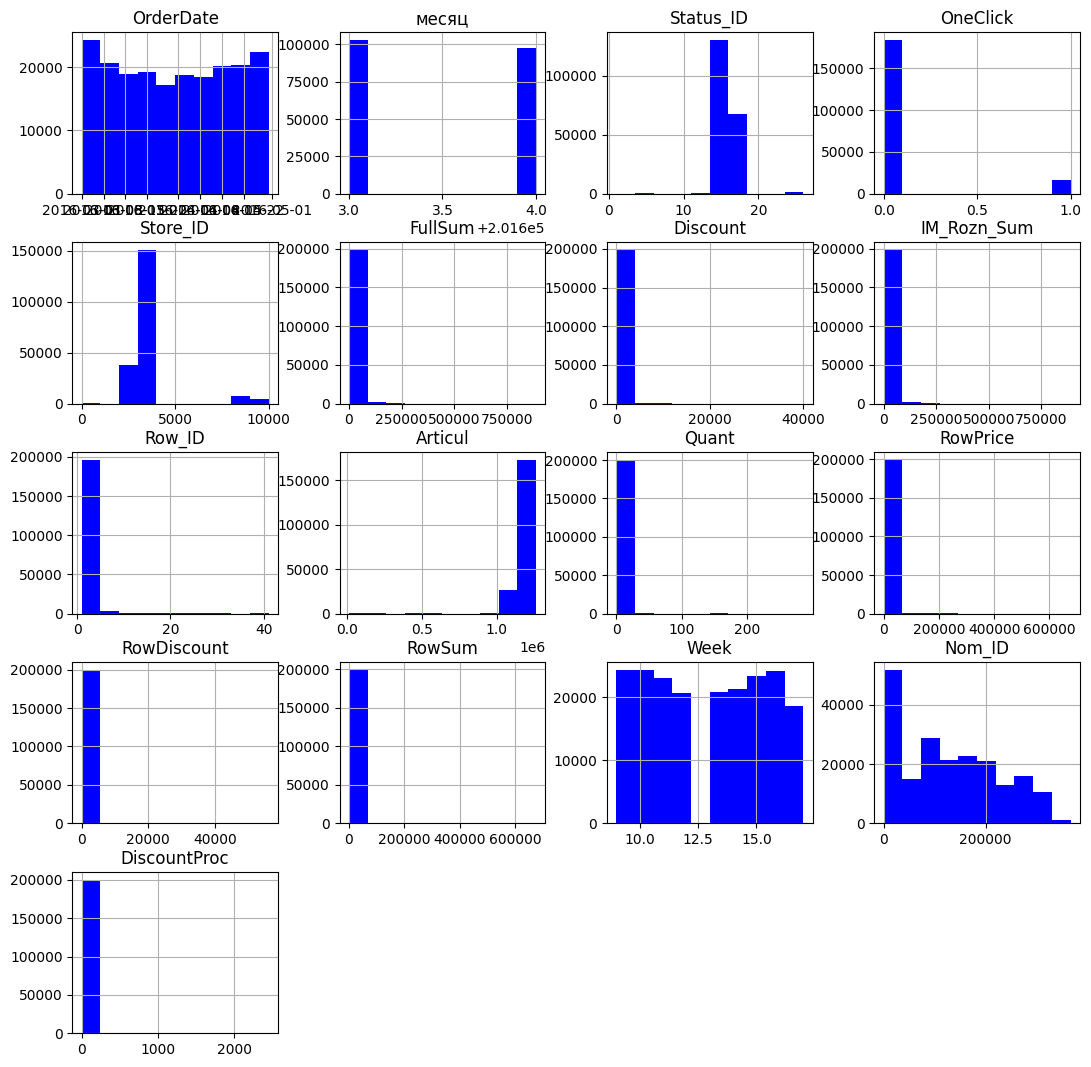

In [ ]:
import matplotlib as plt
plt.rcParams['figure.figsize'] = [13, 13]
df.hist(color='b', alpha=1, bins=10)

In [ ]:
df.Status.value_counts(normalize = True)

Выдан клиенту                   0.648827
Отменен                         0.334731
Отказ на месте                  0.009006
Доставлен в магазин             0.002892
Доставлен частично в магазин    0.002109
Согласован                      0.001895
В обработке                     0.000279
Передан на доставку             0.000100
Собран                          0.000055
Подтвержден на доставку         0.000055
Дубль заказа                    0.000020
Собран частично                 0.000020
Ожидает осмотра                 0.000005
Не собран                       0.000005
Name: Status, dtype: float64

In [ ]:
df.CancelReason.value_counts(normalize=True)

Клиент не пришел за заказом                        0.365989
Клиент передумал                                   0.082509
Нет связи с клиентом                               0.066538
Другое (указать в примечании)                      0.065454
Не поступила оплата                                0.053607
Нет товара                                         0.051381
Несколько заказов                                  0.051095
Клиент отказался назвать причину  отмены заказа    0.048055
Купил в магазине                                   0.033469
Нет партнерского товара                            0.027831
Не устроили дата/время доставки                    0.026647
Неполные данные в заказе                           0.018825
Не устроила дата доставки                          0.017455
Витринный образец/Брак товара                      0.014786
Витрина/брак/некондиция/качество товара            0.013259
Дублирование заказа                                0.013016
Не устроила цена                        

Среди отказов большая часть происходит по причине "Клиент не пришел", можно предположить что это происходит так как оплата в большинстве случаев(75%) - Наличными

In [ ]:
df.Source.value_counts(normalize = True)

Онлайн-Резерв.    0.807143
Колл-центр        0.143226
Сайт              0.041980
Терминал          0.007650
Name: Source, dtype: float64

In [ ]:
df.Region.value_counts(normalize = True)

Москва             0.305758
Санкт-Петербург    0.146379
Воронеж            0.039068
Пермь              0.030895
Новосибирск        0.023334
                     ...   
Красноярск         0.000439
Чебоксары          0.000354
Ижевск             0.000294
Ноябрьск           0.000249
Горно-Алтайск      0.000204
Name: Region, Length: 73, dtype: float64

In [ ]:
df.Store_ID.value_counts(normalize = True)

2789    0.092164
2189    0.074386
3305    0.023663
9999    0.021240
2656    0.017968
          ...   
2552    0.000010
6637    0.000010
8169    0.000005
2568    0.000005
8160    0.000005
Name: Store_ID, Length: 167, dtype: float64

In [ ]:
df.FullSum.describe()

count    200512.000000
mean      12491.245129
std       19341.032880
min           0.000000
25%        2490.000000
50%        6139.000000
75%       14999.000000
max      888740.000000
Name: FullSum, dtype: float64

In [ ]:
df.RowDiscount.describe()


count    200512.000000
mean        144.573731
std         728.821405
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       56090.000000
Name: RowDiscount, dtype: float64

In [ ]:
df.Brand.value_counts()

Samsung          9547
Bosch            7703
Philips          5001
LG               4955
ASUS             4784
                 ... 
NISSAN MARINE       1
Solo by AL-KO       1
Miles               1
Fujitsu             1
SmartBuy            1
Name: Brand, Length: 1178, dtype: int64

In [ ]:
df.TN.value_counts(normalize = True)

Мелкая бытовая техника      0.204542
Крупная бытовая техника     0.158042
Цифровая Техника            0.120399
Сделай сам                  0.094766
Спорт и активный отдых      0.088437
Аксессуары                  0.085953
Детские товары              0.071565
ТВ-Аудио                    0.063195
Мебель                      0.043828
Товары для дома             0.042757
Климат                      0.020803
Игры, софт и развлечения    0.004193
Услуги                      0.001023
Автотовары                  0.000455
Элитная техника             0.000032
Инсталляция                 0.000005
Хобби, досуг                0.000005
Name: TN, dtype: float64

In [ ]:
df.TK.value_counts(normalize = True)


Приготовление пищи                       0.106755
Мобильные средства связи                 0.058885
Встраиваемая техника                     0.057611
Холодильное оборудование                 0.042323
Телевизоры LCD                           0.040594
                                           ...   
Материалы для инсталляции                0.000005
Встраиваемые микроволновые печи (VIP)    0.000005
Садовая мебель                           0.000005
Товары для дома и офиса                  0.000005
Встраиваемые вытяжки (VIP)               0.000005
Name: TK, Length: 112, dtype: float64

In [ ]:
df.Quant.value_counts()

1.0      194240
2.0        4604
3.0         718
4.0         385
5.0         204
6.0          89
10.0         50
8.0          42
7.0          42
9.0          25
13.0         10
15.0         10
11.0          9
12.0          9
14.0          9
20.0          9
17.0          7
160.0         5
19.0          5
16.0          5
0.0           4
18.0          3
30.0          3
24.0          2
40.0          2
25.0          2
23.0          2
285.0         2
29.0          1
38.0          1
49.0          1
32.0          1
79.0          1
71.0          1
150.0         1
21.0          1
33.0          1
35.0          1
53.0          1
50.0          1
80.0          1
28.0          1
55.0          1
Name: Quant, dtype: int64

In [ ]:
df.groupby(by = 'Order_ID').sum()

<ipython-input-50-983dc4504e61>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by = 'Order_ID').sum()


,месяц,Status_ID,OneClick,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Quant,RowPrice,RowDiscount,RowSum,Week,Nom_ID,DiscountProc
Order_ID,,,,,,,,,,,,,,,,
1303000511_TT,201603,17,0,3305,2970.0,0.0,2970.0,2.0,1177293.0,1.0,2970.0,0.0,2970.0,9.0,90364.0,0.000000
1303000513_TT,201603,17,0,2789,19990.0,0.0,19990.0,2.0,1190326.0,1.0,19990.0,0.0,19990.0,10.0,120757.0,0.000000
1303000520_TT,201603,14,0,3518,2420.0,0.0,2420.0,2.0,1172127.0,1.0,2420.0,0.0,2420.0,9.0,76102.0,0.000000
1303000521_TT,201603,14,0,2656,8999.0,2000.0,8999.0,2.0,1179175.0,1.0,10999.0,2000.0,8999.0,9.0,93780.0,18.183471
1303000522_TT,201603,17,0,3080,3919.0,0.0,3919.0,2.0,1234632.0,1.0,3919.0,0.0,3919.0,9.0,271556.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898089_BX,403208,28,0,4378,2298.0,0.0,2298.0,3.0,2263464.0,2.0,1149.0,0.0,1149.0,34.0,68084.0,0.000000
5898095_BX,201604,14,1,3384,1090.0,0.0,1090.0,2.0,1155686.0,1.0,1090.0,0.0,1090.0,17.0,31908.0,0.000000
5898099_BX,201604,17,0,2789,6859.0,0.0,6859.0,2.0,1199370.0,1.0,6859.0,0.0,6859.0,17.0,140459.0,0.000000


In [ ]:
df.shape

(200522, 39)

In [ ]:
df = df[df['Quant']<20]

In [ ]:
df.shape

(200470, 39)

In [ ]:
df.groupby(by = 'Order_ID').sum()

<ipython-input-54-983dc4504e61>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by = 'Order_ID').sum()


,месяц,Status_ID,OneClick,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Quant,RowPrice,RowDiscount,RowSum,Week,Nom_ID,DiscountProc
Order_ID,,,,,,,,,,,,,,,,
1303000511_TT,201603,17,0,3305,2970.0,0.0,2970.0,2.0,1177293.0,1.0,2970.0,0.0,2970.0,9.0,90364.0,0.000000
1303000513_TT,201603,17,0,2789,19990.0,0.0,19990.0,2.0,1190326.0,1.0,19990.0,0.0,19990.0,10.0,120757.0,0.000000
1303000520_TT,201603,14,0,3518,2420.0,0.0,2420.0,2.0,1172127.0,1.0,2420.0,0.0,2420.0,9.0,76102.0,0.000000
1303000521_TT,201603,14,0,2656,8999.0,2000.0,8999.0,2.0,1179175.0,1.0,10999.0,2000.0,8999.0,9.0,93780.0,18.183471
1303000522_TT,201603,17,0,3080,3919.0,0.0,3919.0,2.0,1234632.0,1.0,3919.0,0.0,3919.0,9.0,271556.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898089_BX,403208,28,0,4378,2298.0,0.0,2298.0,3.0,2263464.0,2.0,1149.0,0.0,1149.0,34.0,68084.0,0.000000
5898095_BX,201604,14,1,3384,1090.0,0.0,1090.0,2.0,1155686.0,1.0,1090.0,0.0,1090.0,17.0,31908.0,0.000000
5898099_BX,201604,17,0,2789,6859.0,0.0,6859.0,2.0,1199370.0,1.0,6859.0,0.0,6859.0,17.0,140459.0,0.000000


In [ ]:
pd.set_option('display.max_columns', None)

### Выясним флаг выкупа и удалим невыкупленные товары

In [ ]:
df.Status.value_counts()

Выдан клиенту                   130086
Отменен                          67087
Отказ на месте                    1806
Доставлен в магазин                580
Доставлен частично в магазин       423
Согласован                         380
В обработке                         56
Передан на доставку                 20
Собран                              11
Подтвержден на доставку             11
Дубль заказа                         4
Собран частично                      4
Ожидает осмотра                      1
Не собран                            1
Name: Status, dtype: int64

In [ ]:
df['CancelReason'].value_counts()

Клиент не пришел за заказом                        25637
Клиент передумал                                    5779
Нет связи с клиентом                                4661
Другое (указать в примечании)                       4585
Не поступила оплата                                 3743
Нет товара                                          3598
Несколько заказов                                   3580
Клиент отказался назвать причину  отмены заказа     3359
Купил в магазине                                    2345
Нет партнерского товара                             1950
Не устроили дата/время доставки                     1867
Неполные данные в заказе                            1319
Не устроила дата доставки                           1221
Витринный образец/Брак товара                       1036
Витрина/брак/некондиция/качество товара              929
Дублирование заказа                                  912
Не устроила цена                                     788
Не устроили характеристики това

In [ ]:
df_copy1 = df

In [ ]:
df = df[df['Status'] == "Выдан клиенту"]

In [ ]:
df.shape

(130086, 39)

In [ ]:
df = df[df['CancelReason'] != "NaN"]

In [ ]:
df.Status.value_counts()

Выдан клиенту    130086
Name: Status, dtype: int64

In [ ]:
df.shape

(130086, 39)

In [ ]:
df_copy1.shape

(200470, 39)

### Удаляем Доставку

In [ ]:
df['Nom_Name'].str.contains('Доставка').value_counts()

False    121325
True       8746
Name: Nom_Name, dtype: int64

In [ ]:
df = df[df['Nom_Name'].str.contains('Доставка') == False]


In [ ]:
df.shape

(121325, 39)

In [ ]:
df = df[df['DiscountProc'] < 100]

In [ ]:
df.shape

(121072, 39)

In [ ]:
df_copy2=df

In [ ]:
df.columns

Index(['Order_ID', 'Email_new', 'Phone_new', 'Source', 'OrderDate', 'время',
       'месяц', 'ChangeDate', 'DeliveryDate', 'PaymentDate', 'Status',
       'Status_ID', 'OneClick', 'CancelReason', 'Actions', 'DeliveryType',
       'PaymentType', 'Region', 'Area', 'Store_ID', 'FullSum', 'Discount',
       'IM_Rozn_Sum', 'Row_ID', 'Articul', 'Nom_Name', 'NomGroup', 'Quant',
       'RowPrice', 'RowDiscount', 'RowSum', 'Brand', 'TN', 'TK', 'NomFullPath',
       'Week', 'Nom_ID', 'ID_Email_phone', 'DiscountProc'],
      dtype='object')

In [ ]:
df.head(10)

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,ID_Email_phone,DiscountProc
28,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,2016-03-04 15:09:39.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,КартойПриПолучении,Москва,Москва,3518,2420.0,0.0,2420.0,2.0,1172127.0,Картридж HP №950 CN049AE черный,Картриджи струйные,1.0,2420.0,0.0,2420.0,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9.0,76102.0,56666668112117_pu26@yanded.ru55575449-54535553...,0.000000
30,1303000521_TT,551120117_xu11@bk.ru,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,00:02:17.000,201603,2016-03-03 15:03:50.000,2016-03-02 00:00:00.000,2016-03-02 00:36:12.000,Выдан клиенту,14,0,NaN,"БесплатнаяДоставкаНаСуммуКорзины,СкидкаСуммойП...",Курьерская,Наличные,Санкт-Петербург,Ленинградская обл.,2656,8999.0,2000.0,8999.0,2.0,1179175.0,Эл.плита Darina 1B ЕМ341 406 W,Электрические плиты,1.0,10999.0,2000.0,8999.0,Darina,Крупная бытовая техника,Плиты,Техника для кухни/Крупная бытовая техника/Плит...,9.0,93780.0,551120117_xu11@bk.ru55574954-53565052504871,18.183471
34,1303000523_TT,5566664122117_zu16@hotbox.ru,55575049-51505248534972,Онлайн-Резерв.,2016-03-01,00:03:11.000,201603,2016-03-01 20:28:40.000,2016-03-01 00:00:00.000,2016-03-01 20:28:42.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Москва,Москва,3244,1790.0,0.0,1790.0,2.0,1236714.0,Радиочасы Oregon Scientific RM338P-b,Термометры и метеостанции,1.0,1790.0,0.0,1790.0,Oregon Scientific,Цифровая Техника,Портативная электроника,Техника для дома/Климатическая техника/Термоме...,9.0,279740.0,5566664122117_zu16@hotbox.ru55575049-515052485...,0.000000
36,1303000524_TT,0,55574954-53495654564877,Колл-центр,2016-03-01,00:04:47.000,201603,2016-03-02 11:59:13.000,1900-01-01 00:00:00.000,2016-03-02 11:59:15.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Псков,Псковская обл.,3695,1420.0,0.0,1420.0,1.0,1176285.0,Триммер Remington NE3450,Триммеры для бороды и усов,1.0,1420.0,0.0,1420.0,Remington,Мелкая бытовая техника,Красота и здоровье,Красота и здоровье/Товары для красоты/Триммеры...,9.0,87323.0,055574954-53495654564877,0.000000
38,1303000525_TT,5563110117_nu16@list.ru,55575054-53544849485671,Онлайн-Резерв.,2016-03-01,00:06:05.000,201603,2016-03-01 17:29:03.000,2016-03-01 00:00:00.000,2016-03-01 17:29:05.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Смоленск,Смоленская обл.,3344,249.0,0.0,249.0,2.0,1062590.0,Струны ELO нейлон,Аксессуары для гитар и синтезаторов,1.0,249.0,0.0,249.0,ELO,ТВ-Аудио,Музыкальные инструменты,"Телевизоры, аудио, видео/Игры, софт, развлечен...",9.0,1550.0,5563110117_nu16@list.ru55575054-53544849485671,0.000000
40,1303000526_TT,53110109_nm16@gmail.com,55575456-52485253545172,Онлайн-Резерв.,2016-03-01,00:06:22.000,201603,2016-03-03 14:32:35.000,2016-03-02 00:00:00.000,2016-03-02 02:23:05.000,Выдан клиенту,14,0,NaN,NaN,Курьерская,Наличные,Москва,Москва,2789,3498.0,0.0,3498.0,2.0,1198941.0,Сушилка д/фруктов Scarlett SC-FD421002,Сушилки для овощей и фруктов,1.0,2599.0,0.0,2599.0,Scarlett,Мелкая бытовая техника,Приготовление пищи,Техника для кухни/Обработка продуктов/Сушилки ...,9.0,140210.0,53110109_nm16@gmail.com55575456-52485253545172,0.000000
41,1303000526_TT,53110109_nm16@gmail.com,55575456-52485253545172,Онлайн-Резерв.,2016-03-01,00:06:22.000,201603,2016-03-03 14:32:35.000,2016-03-02 00:00:00.000,2016-03-02 02:23:05.000,Выдан клиенту,14,0,NaN,NaN,Курьерская,Наличные,Москва,Москва,2789,3498.0,0.0,3498.0,3.0,1102944.0,Сет.фильтр Defender DFS 603,Сетевые фильтры,1.0,649.0,0.0,649.0,Defender,Аксессуары,Электропитание,"Компьютеры, ноутбуки, планшеты/Аксессуары/Элек...",9.0,165713.0,53110109

## Cities -> Regions


In [ ]:
df_city = pd.read_excel('CityDiploma.xlsx')

In [ ]:
df_city.head(1)

,City,Region,Subject
0,Алексеевка,CENTRAL,Белгородская область


In [ ]:

df_city = df_city.drop(['Subject'], axis=1)

In [ ]:
df_city.head()

,City,Region
0,Алексеевка,CENTRAL
1,Белгород,CENTRAL
2,Валуйки,CENTRAL
3,Губкин,CENTRAL
4,Старый Оскол,CENTRAL


In [ ]:
df_city = df_city.rename(columns={'City': 'Region', 'Region': 'RegionNew'})

In [ ]:
df_copy_city = df

In [ ]:
result = pd.merge(df, df_city, on='Region', how='left')

In [ ]:
result.head()

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,ID_Email_phone,DiscountProc,RegionNew
0,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,2016-03-04 15:09:39.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,КартойПриПолучении,Москва,Москва,3518,2420.0,0.0,2420.0,2.0,1172127.0,Картридж HP №950 CN049AE черный,Картриджи струйные,1.0,2420.0,0.0,2420.0,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9.0,76102.0,56666668112117_pu26@yanded.ru55575449-54535553...,0.000000,CENTRAL
1,1303000521_TT,551120117_xu11@bk.ru,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,00:02:17.000,201603,2016-03-03 15:03:50.000,2016-03-02 00:00:00.000,2016-03-02 00:36:12.000,Выдан клиенту,14,0,NaN,"БесплатнаяДоставкаНаСуммуКорзины,СкидкаСуммойП...",Курьерская,Наличные,Санкт-Петербург,Ленинградская обл.,2656,8999.0,2000.0,8999.0,2.0,1179175.0,Эл.плита Darina 1B ЕМ341 406 W,Электрические плиты,1.0,10999.0,2000.0,8999.0,Darina,Крупная бытовая техника,Плиты,Техника для кухни/Крупная бытовая техника/Плит...,9.0,93780.0,551120117_xu11@bk.ru55574954-53565052504871,18.183471,NORTH
2,1303000523_TT,5566664122117_zu16@hotbox.ru,55575049-51505248534972,Онлайн-Резерв.,2016-03-01,00:03:11.000,201603,2016-03-01 20:28:40.000,2016-03-01 00:00:00.000,2016-03-01 20:28:42.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Москва,Москва,3244,1790.0,0.0,1790.0,2.0,1236714.0,Радиочасы Oregon Scientific RM338P-b,Термометры и метеостанции,1.0,1790.0,0.0,1790.0,Oregon Scientific,Цифровая Техника,Портативная электроника,Техника для дома/Климатическая техника/Термоме...,9.0,279740.0,5566664122117_zu16@hotbox.ru55575049-515052485...,0.000000,CENTRAL
3,1303000524_TT,0,55574954-53495654564877,Колл-центр,2016-03-01,00:04:47.000,201603,2016-03-02 11:59:13.000,1900-01-01 00:00:00.000,2016-03-02 11:59:15.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Псков,Псковская обл.,3695,1420.0,0.0,1420.0,1.0,1176285.0,Триммер Remington NE3450,Триммеры для бороды и усов,1.0,1420.0,0.0,1420.0,Remington,Мелкая бытовая техника,Красота и здоровье,Красота и здоровье/Товары для красоты/Триммеры...,9.0,87323.0,055574954-53495654564877,0.000000,NORTH
4,1303000525_TT,5563110117_nu16@list.ru,55575054-53544849485671,Онлайн-Резерв.,2016-03-01,00:06:05.000,201603,2016-03-01 17:29:03.000,2016-03-01 00:00:00.000,2016-03-01 17:29:05.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Смоленск,Смоленская обл.,3344,249.0,0.0,249.0,2.0,1062590.0,Струны ELO нейлон,Аксессуары для гитар и синтезаторов,1.0,249.0,0.0,249.0,ELO,ТВ-Аудио,Музыкальные инструменты,"Телевизоры, аудио, видео/Игры, софт, развлечен...",9.0,1550.0,5563110117_nu16@list.ru55575054-53544849485671,0.000000,CENTRAL


In [ ]:
result.shape

(121072, 40)

In [ ]:
result['RegionNew'].value_counts()

CENTRAL      64772
NORTH        30404
PRIVOLZIE    12832
SIBERIA       5485
SOUTHERN      4024
URAL          3508
FAR EAST        47
Name: RegionNew, dtype: int64

In [ ]:
df = result


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Clusterization

In [ ]:
df.head()

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,ID_Email_phone,DiscountProc,RegionNew
0,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,2016-03-04 15:09:39.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,КартойПриПолучении,Москва,Москва,3518,2420.0,0.0,2420.0,2.0,1172127.0,Картридж HP №950 CN049AE черный,Картриджи струйные,1.0,2420.0,0.0,2420.0,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9.0,76102.0,56666668112117_pu26@yanded.ru55575449-54535553...,0.000000,CENTRAL
1,1303000521_TT,551120117_xu11@bk.ru,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,00:02:17.000,201603,2016-03-03 15:03:50.000,2016-03-02 00:00:00.000,2016-03-02 00:36:12.000,Выдан клиенту,14,0,NaN,"БесплатнаяДоставкаНаСуммуКорзины,СкидкаСуммойП...",Курьерская,Наличные,Санкт-Петербург,Ленинградская обл.,2656,8999.0,2000.0,8999.0,2.0,1179175.0,Эл.плита Darina 1B ЕМ341 406 W,Электрические плиты,1.0,10999.0,2000.0,8999.0,Darina,Крупная бытовая техника,Плиты,Техника для кухни/Крупная бытовая техника/Плит...,9.0,93780.0,551120117_xu11@bk.ru55574954-53565052504871,18.183471,NORTH
2,1303000523_TT,5566664122117_zu16@hotbox.ru,55575049-51505248534972,Онлайн-Резерв.,2016-03-01,00:03:11.000,201603,2016-03-01 20:28:40.000,2016-03-01 00:00:00.000,2016-03-01 20:28:42.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Москва,Москва,3244,1790.0,0.0,1790.0,2.0,1236714.0,Радиочасы Oregon Scientific RM338P-b,Термометры и метеостанции,1.0,1790.0,0.0,1790.0,Oregon Scientific,Цифровая Техника,Портативная электроника,Техника для дома/Климатическая техника/Термоме...,9.0,279740.0,5566664122117_zu16@hotbox.ru55575049-515052485...,0.000000,CENTRAL
3,1303000524_TT,0,55574954-53495654564877,Колл-центр,2016-03-01,00:04:47.000,201603,2016-03-02 11:59:13.000,1900-01-01 00:00:00.000,2016-03-02 11:59:15.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Псков,Псковская обл.,3695,1420.0,0.0,1420.0,1.0,1176285.0,Триммер Remington NE3450,Триммеры для бороды и усов,1.0,1420.0,0.0,1420.0,Remington,Мелкая бытовая техника,Красота и здоровье,Красота и здоровье/Товары для красоты/Триммеры...,9.0,87323.0,055574954-53495654564877,0.000000,NORTH
4,1303000525_TT,5563110117_nu16@list.ru,55575054-53544849485671,Онлайн-Резерв.,2016-03-01,00:06:05.000,201603,2016-03-01 17:29:03.000,2016-03-01 00:00:00.000,2016-03-01 17:29:05.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Смоленск,Смоленская обл.,3344,249.0,0.0,249.0,2.0,1062590.0,Струны ELO нейлон,Аксессуары для гитар и синтезаторов,1.0,249.0,0.0,249.0,ELO,ТВ-Аудио,Музыкальные инструменты,"Телевизоры, аудио, видео/Игры, софт, развлечен...",9.0,1550.0,5563110117_nu16@list.ru55575054-53544849485671,0.000000,CENTRAL


In [ ]:
data = df


In [ ]:
df.head()

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,ID_Email_phone,DiscountProc,RegionNew
0,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,2016-03-04 15:09:39.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,КартойПриПолучении,Москва,Москва,3518,2420.0,0.0,2420.0,2.0,1172127.0,Картридж HP №950 CN049AE черный,Картриджи струйные,1.0,2420.0,0.0,2420.0,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9.0,76102.0,56666668112117_pu26@yanded.ru55575449-54535553...,0.000000,CENTRAL
1,1303000521_TT,551120117_xu11@bk.ru,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,00:02:17.000,201603,2016-03-03 15:03:50.000,2016-03-02 00:00:00.000,2016-03-02 00:36:12.000,Выдан клиенту,14,0,NaN,"БесплатнаяДоставкаНаСуммуКорзины,СкидкаСуммойП...",Курьерская,Наличные,Санкт-Петербург,Ленинградская обл.,2656,8999.0,2000.0,8999.0,2.0,1179175.0,Эл.плита Darina 1B ЕМ341 406 W,Электрические плиты,1.0,10999.0,2000.0,8999.0,Darina,Крупная бытовая техника,Плиты,Техника для кухни/Крупная бытовая техника/Плит...,9.0,93780.0,551120117_xu11@bk.ru55574954-53565052504871,18.183471,NORTH
2,1303000523_TT,5566664122117_zu16@hotbox.ru,55575049-51505248534972,Онлайн-Резерв.,2016-03-01,00:03:11.000,201603,2016-03-01 20:28:40.000,2016-03-01 00:00:00.000,2016-03-01 20:28:42.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Москва,Москва,3244,1790.0,0.0,1790.0,2.0,1236714.0,Радиочасы Oregon Scientific RM338P-b,Термометры и метеостанции,1.0,1790.0,0.0,1790.0,Oregon Scientific,Цифровая Техника,Портативная электроника,Техника для дома/Климатическая техника/Термоме...,9.0,279740.0,5566664122117_zu16@hotbox.ru55575049-515052485...,0.000000,CENTRAL
3,1303000524_TT,0,55574954-53495654564877,Колл-центр,2016-03-01,00:04:47.000,201603,2016-03-02 11:59:13.000,1900-01-01 00:00:00.000,2016-03-02 11:59:15.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Псков,Псковская обл.,3695,1420.0,0.0,1420.0,1.0,1176285.0,Триммер Remington NE3450,Триммеры для бороды и усов,1.0,1420.0,0.0,1420.0,Remington,Мелкая бытовая техника,Красота и здоровье,Красота и здоровье/Товары для красоты/Триммеры...,9.0,87323.0,055574954-53495654564877,0.000000,NORTH
4,1303000525_TT,5563110117_nu16@list.ru,55575054-53544849485671,Онлайн-Резерв.,2016-03-01,00:06:05.000,201603,2016-03-01 17:29:03.000,2016-03-01 00:00:00.000,2016-03-01 17:29:05.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Смоленск,Смоленская обл.,3344,249.0,0.0,249.0,2.0,1062590.0,Струны ELO нейлон,Аксессуары для гитар и синтезаторов,1.0,249.0,0.0,249.0,ELO,ТВ-Аудио,Музыкальные инструменты,"Телевизоры, аудио, видео/Игры, софт, развлечен...",9.0,1550.0,5563110117_nu16@list.ru55575054-53544849485671,0.000000,CENTRAL


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data.columns

Index(['Order_ID', 'Email_new', 'Phone_new', 'Source', 'OrderDate', 'время',
       'месяц', 'ChangeDate', 'DeliveryDate', 'PaymentDate', 'Status',
       'Status_ID', 'OneClick', 'CancelReason', 'Actions', 'DeliveryType',
       'PaymentType', 'Region', 'Area', 'Store_ID', 'FullSum', 'Discount',
       'IM_Rozn_Sum', 'Row_ID', 'Articul', 'Nom_Name', 'NomGroup', 'Quant',
       'RowPrice', 'RowDiscount', 'RowSum', 'Brand', 'TN', 'TK', 'NomFullPath',
       'Week', 'Nom_ID', 'ID_Email_phone', 'DiscountProc', 'RegionNew'],
      dtype='object')

In [ ]:
selected_cols = ['ID_Email_phone', 'Order_ID', 'RegionNew', 'DeliveryType', 'PaymentType', 'IM_Rozn_Sum',
                 'NomGroup', 'Quant', 'RowPrice', 'RowDiscount', 'RowSum', 'Brand', 'TN', 'TK', 'DiscountProc']
data = data[selected_cols]

In [ ]:
data['TN'] = data['TN'].astype(str)


<ipython-input-225-d409233da1e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TN'] = data['TN'].astype(str)


In [ ]:
cols = ['ID_Email_phone', 'RegionNew', 'TN','RowPrice', 'RowDiscount', 'RowSum']

grouped = data[cols].groupby('ID_Email_phone').agg({
    'RegionNew': 'first',
    'TN': lambda x: ','.join(x),

    'RowPrice': 'sum',
    'RowDiscount': 'sum',
    'RowSum': 'sum'
})

grouped = grouped.reset_index()

In [ ]:
grouped.head()

,ID_Email_phone,RegionNew,TN,RowPrice,RowDiscount,RowSum
0,032565748-000000000,CENTRAL,"Аксессуары,Мелкая бытовая техника,ТВ-Аудио,Дет...",19757.0,0.0,19757.0
1,032565750-575448565151 а,CENTRAL,"Климат,Климат",26599.0,0.0,26599.0
2,055505055-535453565656795,NORTH,ТВ-Аудио,11639.0,0.0,11639.0
3,055515448-574855545054795,NORTH,Сделай сам,5290.0,0.0,5290.0
4,055525757-495254575153735,NORTH,Мелкая бытовая техника,5990.0,0.0,5990.0


In [ ]:
grouped['NumberOfItems'] = grouped['TN'].apply(lambda x: len(x.split(',')))


In [ ]:
grouped.head()

,ID_Email_phone,RegionNew,TN,RowPrice,RowDiscount,RowSum,NumberOfItems
0,032565748-000000000,CENTRAL,"Аксессуары,Мелкая бытовая техника,ТВ-Аудио,Дет...",19757.0,0.0,19757.0,8
1,032565750-575448565151 а,CENTRAL,"Климат,Климат",26599.0,0.0,26599.0,2
2,055505055-535453565656795,NORTH,ТВ-Аудио,11639.0,0.0,11639.0,1
3,055515448-574855545054795,NORTH,Сделай сам,5290.0,0.0,5290.0,1
4,055525757-495254575153735,NORTH,Мелкая бытовая техника,5990.0,0.0,5990.0,1


In [ ]:
unique_nomgroups = set(','.join(grouped.head()['TN']).split(','))
nomgroup_dummies = grouped['TN'].str.get_dummies(sep=',')
grouped = pd.concat([grouped, nomgroup_dummies], axis=1)
grouped.head()


,ID_Email_phone,RegionNew,TN,RowPrice,RowDiscount,RowSum,NumberOfItems,досуг,софт и развлечения,nan,Автотовары,Аксессуары,Детские товары,Игры,Климат,Крупная бытовая техника,Мебель,Мелкая бытовая техника,Сделай сам,Спорт и активный отдых,ТВ-Аудио,Товары для дома,Услуги,Хобби,Цифровая Техника,Элитная техника
0,032565748-000000000,CENTRAL,"Аксессуары,Мелкая бытовая техника,ТВ-Аудио,Дет...",19757.0,0.0,19757.0,8,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0
1,032565750-575448565151 а,CENTRAL,"Климат,Климат",26599.0,0.0,26599.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,055505055-535453565656795,NORTH,ТВ-Аудио,11639.0,0.0,11639.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,055515448-574855545054795,NORTH,Сделай сам,5290.0,0.0,5290.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,055525757-495254575153735,NORTH,Мелкая бытовая техника,5990.0,0.0,5990.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_cluster = grouped.drop('TN', axis=1)
df_cluster = df_cluster.drop('ID_Email_phone',axis=1)
df_encoded = pd.get_dummies(df_cluster, columns=['RegionNew'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded_scaled = scaler.fit_transform(df_encoded)
df_encoded_scaled = pd.DataFrame(df_encoded_scaled, columns=df_encoded.columns)


In [ ]:
df_encoded_scaled.head()

,RowPrice,RowDiscount,RowSum,NumberOfItems,досуг,софт и развлечения,nan,Автотовары,Аксессуары,Детские товары,Игры,Климат,Крупная бытовая техника,Мебель,Мелкая бытовая техника,Сделай сам,Спорт и активный отдых,ТВ-Аудио,Товары для дома,Услуги,Хобби,Цифровая Техника,Элитная техника,RegionNew_CENTRAL,RegionNew_FAR EAST,RegionNew_NORTH,RegionNew_PRIVOLZIE,RegionNew_SIBERIA,RegionNew_SOUTHERN,RegionNew_URAL
0,0.011349,0.0,0.011577,0.061947,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.015280,0.0,0.015586,0.008850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006686,0.0,0.006820,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.003038,0.0,0.003099,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.003440,0.0,0.003509,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from tqdm import tqdm_notebook as tqdm
from sklearn import metrics

In [ ]:
%%time
X = df_encoded_scaled
n_clusters = np.arange(2, 12)
silhouette = []
sum_of_squared_distances = []
with tqdm(total=len(n_clusters)) as pbar: 
    for n in n_clusters:
        clusterer = KMeans(n_clusters=n, random_state=420)
        clusterer.fit(X)
        sum_of_squared_distances.append(clusterer.inertia_)
        labels = clusterer.predict(X)
        score = metrics.silhouette_score(X, labels, random_state=666)
        silhouette.append(score) 
        pbar.update(1)

<timed exec>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

CPU times: user 20min 35s, sys: 5min 29s, total: 26min 5s
Wall time: 20min 17s


ValueError: ignored

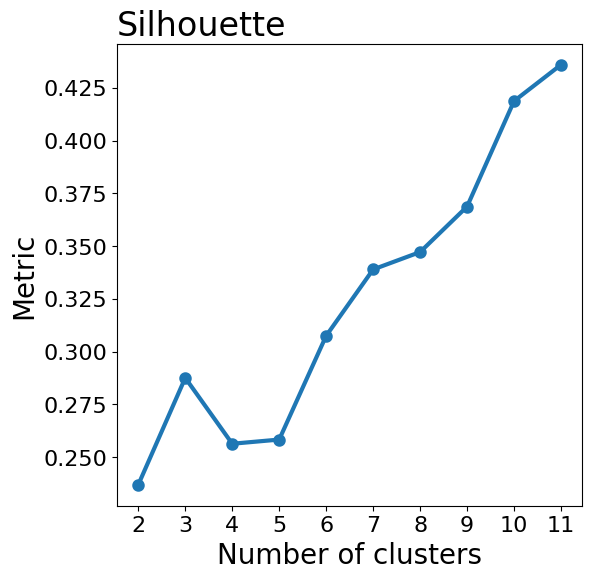

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(n_clusters, silhouette, linewidth=3) 
plt.scatter(n_clusters, silhouette, linewidth=3) 
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.xlabel('Number of clusters', size=20)
plt.ylabel('Metric', size=20)
plt.title("Silhouette", loc='left', size=24) 
plt.show()

In [ ]:
labels

array([8, 9, 1, ..., 6, 3, 0], dtype=int32)

In [ ]:
        clusterer = KMeans(n_clusters=9, random_state=420)
        clusterer.fit(X)
        labels = clusterer.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
grouped.head()

,ID_Email_phone,RegionNew,TN,RowPrice,RowDiscount,RowSum,NumberOfItems,досуг,софт и развлечения,nan,Автотовары,Аксессуары,Детские товары,Игры,Климат,Крупная бытовая техника,Мебель,Мелкая бытовая техника,Сделай сам,Спорт и активный отдых,ТВ-Аудио,Товары для дома,Услуги,Хобби,Цифровая Техника,Элитная техника
0,032565748-000000000,CENTRAL,"Аксессуары,Мелкая бытовая техника,ТВ-Аудио,Дет...",19757.0,0.0,19757.0,8,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0
1,032565750-575448565151 а,CENTRAL,"Климат,Климат",26599.0,0.0,26599.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,055505055-535453565656795,NORTH,ТВ-Аудио,11639.0,0.0,11639.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,055515448-574855545054795,NORTH,Сделай сам,5290.0,0.0,5290.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,055525757-495254575153735,NORTH,Мелкая бытовая техника,5990.0,0.0,5990.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
grouped = grouped[cols]

In [ ]:
grouped['cluster'] = labels

In [ ]:
grouped.head()

,ID_Email_phone,RegionNew,TN,RowPrice,RowDiscount,RowSum,cluster
0,032565748-000000000,CENTRAL,"Аксессуары,Мелкая бытовая техника,ТВ-Аудио,Дет...",19757.0,0.0,19757.0,0
1,032565750-575448565151 а,CENTRAL,"Климат,Климат",26599.0,0.0,26599.0,5
2,055505055-535453565656795,NORTH,ТВ-Аудио,11639.0,0.0,11639.0,6
3,055515448-574855545054795,NORTH,Сделай сам,5290.0,0.0,5290.0,6
4,055525757-495254575153735,NORTH,Мелкая бытовая техника,5990.0,0.0,5990.0,6


In [ ]:

grouped['TN_list'] = grouped['TN'].str.split(',')
grouped.head()

,ID_Email_phone,RegionNew,TN,RowPrice,RowDiscount,RowSum,cluster,TN_list
0,032565748-000000000,CENTRAL,"Аксессуары,Мелкая бытовая техника,ТВ-Аудио,Дет...",19757.0,0.0,19757.0,0,"[Аксессуары, Мелкая бытовая техника, ТВ-Аудио,..."
1,032565750-575448565151 а,CENTRAL,"Климат,Климат",26599.0,0.0,26599.0,5,"[Климат, Климат]"
2,055505055-535453565656795,NORTH,ТВ-Аудио,11639.0,0.0,11639.0,6,[ТВ-Аудио]
3,055515448-574855545054795,NORTH,Сделай сам,5290.0,0.0,5290.0,6,[Сделай сам]
4,055525757-495254575153735,NORTH,Мелкая бытовая техника,5990.0,0.0,5990.0,6,[Мелкая бытовая техника]


In [ ]:

tn_pct = lambda x: pd.Series(x).explode().value_counts(normalize=True).to_dict()

summary = grouped.groupby('cluster').agg({
    'TN_list': tn_pct,
    'RowSum': 'mean',
    'RegionNew': lambda x: {region: count / len(x) for region, count in pd.Series(x).value_counts().items()}
})

summary['RegionNew'] = summary['RegionNew'].apply(lambda x: ', '.join([f"{region}={p:.2f}" for region, p in x.items()]))
summary['TN_list'] = summary['TN_list'].apply(lambda x: ', '.join([f"{tn}={p:.2f}" for tn, p in x.items()]))


                                                   TN_list        RowSum  \
cluster                                                                    
0        Мелкая бытовая техника=0.82, Крупная бытовая т...   8426.110742   
1        Крупная бытовая техника=0.81, Мелкая бытовая т...  23885.836214   
2        Крупная бытовая техника=0.89, nan=0.03, Аксесс...  21876.910129   
3        Мелкая бытовая техника=0.18, Спорт и активный ...   9728.806551   
4        Крупная бытовая техника=0.19, Мелкая бытовая т...  11131.425478   
5        Сделай сам=0.24, Спорт и активный отдых=0.19, ...   7945.229699   
6        Мелкая бытовая техника=0.37, Сделай сам=0.13, ...   7134.524798   
7        Цифровая Техника=0.48, Аксессуары=0.40, ТВ-Ауд...  10990.968066   
8        Цифровая Техника=0.44, Аксессуары=0.40, ТВ-Ауд...  10554.604118   

                                                 RegionNew  
cluster                                                     
0                              CENTRAL=1.

In [ ]:
summary.head(10)


,TN_list,RowSum,RegionNew
cluster,,,
0,"Мелкая бытовая техника=0.82, Крупная бытовая т...",8426.110742,"CENTRAL=1.00, FAR EAST=0.00"
1,"Крупная бытовая техника=0.81, Мелкая бытовая т...",23885.836214,"NORTH=0.82, SOUTHERN=0.10, URAL=0.09, FAR EAST..."
2,"Крупная бытовая техника=0.89, nan=0.03, Аксесс...",21876.910129,CENTRAL=1.00
3,"Мелкая бытовая техника=0.18, Спорт и активный ...",9728.806551,"SIBERIA=0.48, SOUTHERN=0.28, URAL=0.24, FAR EA..."
4,"Крупная бытовая техника=0.19, Мелкая бытовая т...",11131.425478,PRIVOLZIE=1.00
5,"Сделай сам=0.24, Спорт и активный отдых=0.19, ...",7945.229699,CENTRAL=1.00
6,"Мелкая бытовая техника=0.37, Сделай сам=0.13, ...",7134.524798,NORTH=1.00
7,"Цифровая Техника=0.48, Аксессуары=0.40, ТВ-Ауд...",10990.968066,CENTRAL=1.00
8,"Цифровая Техника=0.44, Аксессуары=0.40, ТВ-Ауд...",10554.604118,"NORTH=0.99, URAL=0.01, SOUTHERN=0.00"


In [ ]:


def get_top_tns(row, n=3):

    tns = row['TN_list'].split(', ')

    tns = [tn.split('=') for tn in tns]

    top_tns = sorted(tns, key=lambda x: float(x[1]), reverse=True)[:n]

    top_tns_str = ', '.join([f'{tn[0]} ({tn[1]})' for tn in top_tns])
    return top_tns_str

def get_top_region(row):

    regions = row['RegionNew'].split(', ')

    regions = [region.split('=') for region in regions]

    top_region = sorted(regions, key=lambda x: float(x[1]), reverse=True)[0]

    return top_region[0]


summary['Top 3 TNs'] = summary.apply(get_top_tns, axis=1)
summary['Top Region'] = summary.apply(get_top_region, axis=1)

for index, row in summary.iterrows():
    print(f'Cluster {index}:')
    print(f'- Top 3 TNs: {row["Top 3 TNs"]}')
    print(f'- Top Region: {row["Top Region"]}')
    print(f'- RowSum: {row["RowSum"]}\n')


Cluster 0:
- Top 3 TNs: Мелкая бытовая техника (0.82), Крупная бытовая техника (0.06), Товары для дома (0.03)
- Top Region: CENTRAL
- RowSum: 8426.110741521987

Cluster 1:
- Top 3 TNs: Крупная бытовая техника (0.81), Мелкая бытовая техника (0.08), ТВ-Аудио (0.02)
- Top Region: NORTH
- RowSum: 23885.836213517665

Cluster 2:
- Top 3 TNs: Крупная бытовая техника (0.89), nan (0.03), Аксессуары (0.02)
- Top Region: CENTRAL
- RowSum: 21876.910129369666

Cluster 3:
- Top 3 TNs: Мелкая бытовая техника (0.18), Спорт и активный отдых (0.14), Сделай сам (0.14)
- Top Region: SIBERIA
- RowSum: 9728.80655142979

Cluster 4:
- Top 3 TNs: Крупная бытовая техника (0.19), Мелкая бытовая техника (0.18), Сделай сам (0.10)
- Top Region: PRIVOLZIE
- RowSum: 11131.425477955521

Cluster 5:
- Top 3 TNs: Сделай сам (0.24), Спорт и активный отдых (0.19), Детские товары (0.16)
- Top Region: CENTRAL
- RowSum: 7945.229699191483

Cluster 6:
- Top 3 TNs: Мелкая бытовая техника (0.37), Сделай сам (0.13), Спорт и активн

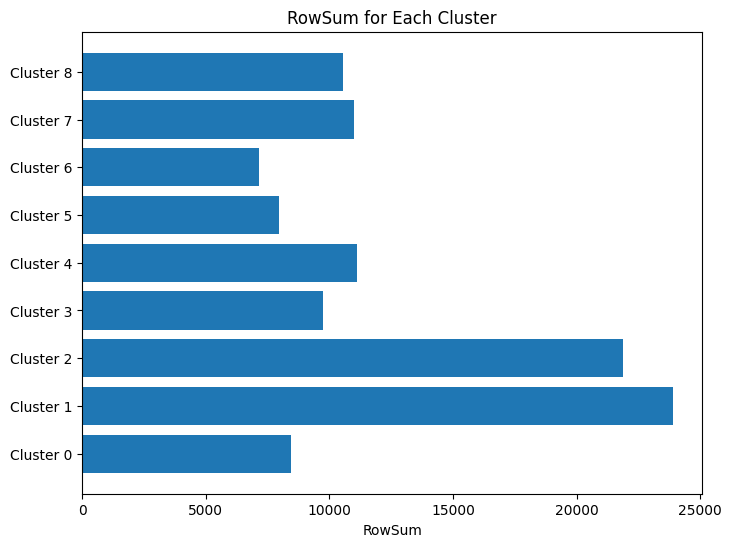

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(summary.index, summary['RowSum'])
ax.set_yticks(summary.index)
ax.set_yticklabels([f'Cluster {index}' for index in summary.index])
ax.set_xlabel('RowSum')
ax.set_title('RowSum for Each Cluster')
plt.show()


In [ ]:
print(summary.columns)

Index(['TN_list', 'RowSum', 'RegionNew', 'Top 3 TNs', 'Top Region'], dtype='object')


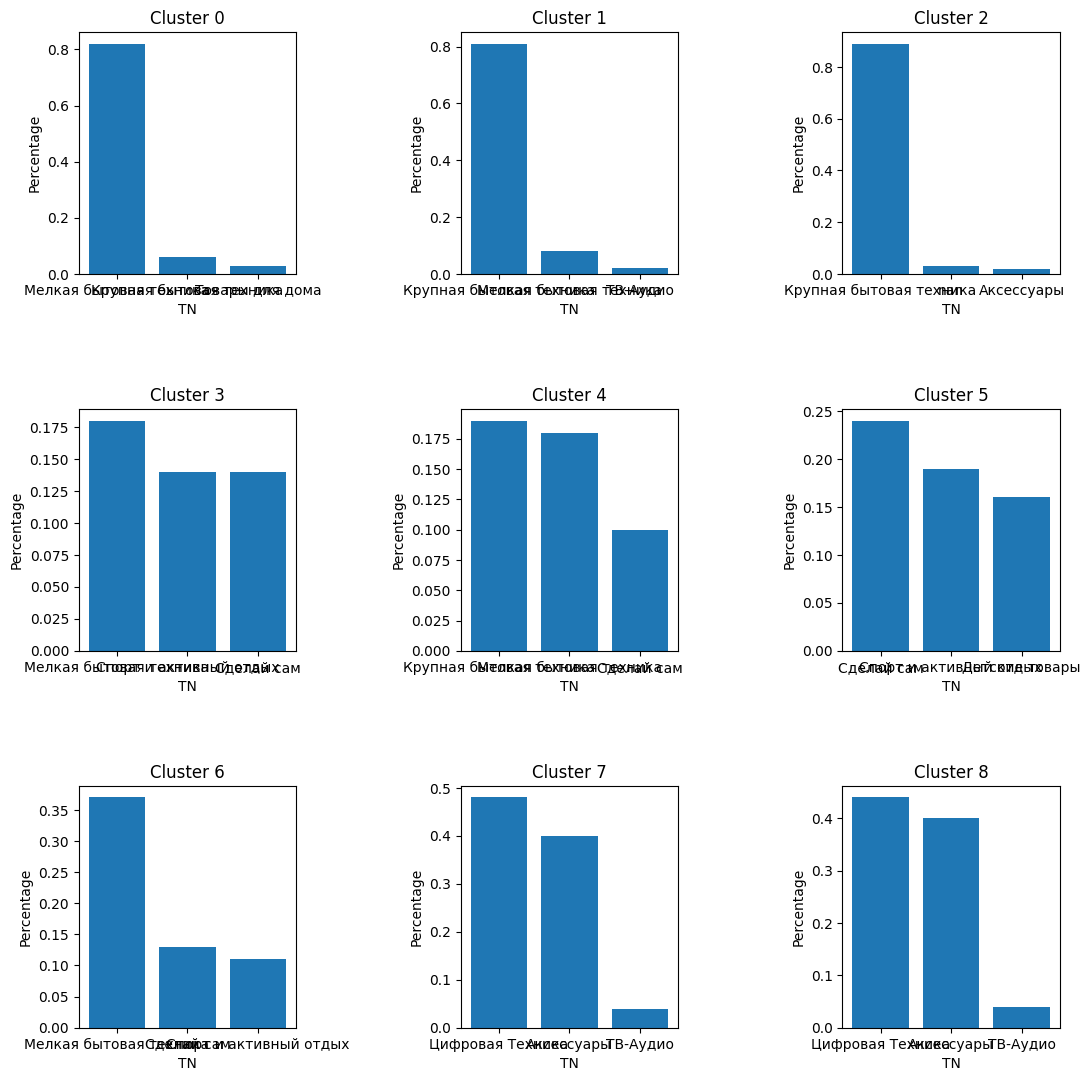

In [ ]:
import matplotlib.pyplot as plt

def plot_top_tns_subplot(ax, cluster_index):
    cluster_row = summary.loc[cluster_index]
    tns = cluster_row['Top 3 TNs'].split(', ')
    tn_names = [tn.split(' (')[0] for tn in tns]
    tn_percs = [float(tn.split(' (')[1][:-1]) for tn in tns]
    ax.bar(tn_names, tn_percs)
    ax.set_xlabel('TN')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Cluster {cluster_index}')


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    if i < len(summary.index):
        plot_top_tns_subplot(ax, i)
    else:
        ax.axis('off')

fig.tight_layout(pad=5.0)

plt.show()


In [ ]:
clusters_df = grouped.loc[:, ['ID_Email_phone','cluster']]

In [ ]:
merged_df = df.merge(clusters_df, on='ID_Email_phone')

In [ ]:
merged_df.head()

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,ID_Email_phone,DiscountProc,RegionNew,cluster
0,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,2016-03-04 15:09:39.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,КартойПриПолучении,Москва,Москва,3518,2420.0,0.0,2420.0,2.0,1172127.0,Картридж HP №950 CN049AE черный,Картриджи струйные,1.0,2420.0,0.0,2420.0,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9.0,76102.0,56666668112117_pu26@yanded.ru55575449-54535553...,0.000000,CENTRAL,7
1,1303000521_TT,551120117_xu11@bk.ru,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,00:02:17.000,201603,2016-03-03 15:03:50.000,2016-03-02 00:00:00.000,2016-03-02 00:36:12.000,Выдан клиенту,14,0,NaN,"БесплатнаяДоставкаНаСуммуКорзины,СкидкаСуммойП...",Курьерская,Наличные,Санкт-Петербург,Ленинградская обл.,2656,8999.0,2000.0,8999.0,2.0,1179175.0,Эл.плита Darina 1B ЕМ341 406 W,Электрические плиты,1.0,10999.0,2000.0,8999.0,Darina,Крупная бытовая техника,Плиты,Техника для кухни/Крупная бытовая техника/Плит...,9.0,93780.0,551120117_xu11@bk.ru55574954-53565052504871,18.183471,NORTH,1
2,1303000523_TT,5566664122117_zu16@hotbox.ru,55575049-51505248534972,Онлайн-Резерв.,2016-03-01,00:03:11.000,201603,2016-03-01 20:28:40.000,2016-03-01 00:00:00.000,2016-03-01 20:28:42.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Москва,Москва,3244,1790.0,0.0,1790.0,2.0,1236714.0,Радиочасы Oregon Scientific RM338P-b,Термометры и метеостанции,1.0,1790.0,0.0,1790.0,Oregon Scientific,Цифровая Техника,Портативная электроника,Техника для дома/Климатическая техника/Термоме...,9.0,279740.0,5566664122117_zu16@hotbox.ru55575049-515052485...,0.000000,CENTRAL,7
3,1303000524_TT,0,55574954-53495654564877,Колл-центр,2016-03-01,00:04:47.000,201603,2016-03-02 11:59:13.000,1900-01-01 00:00:00.000,2016-03-02 11:59:15.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Псков,Псковская обл.,3695,1420.0,0.0,1420.0,1.0,1176285.0,Триммер Remington NE3450,Триммеры для бороды и усов,1.0,1420.0,0.0,1420.0,Remington,Мелкая бытовая техника,Красота и здоровье,Красота и здоровье/Товары для красоты/Триммеры...,9.0,87323.0,055574954-53495654564877,0.000000,NORTH,6
4,1303000525_TT,5563110117_nu16@list.ru,55575054-53544849485671,Онлайн-Резерв.,2016-03-01,00:06:05.000,201603,2016-03-01 17:29:03.000,2016-03-01 00:00:00.000,2016-03-01 17:29:05.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,Наличные,Смоленск,Смоленская обл.,3344,249.0,0.0,249.0,2.0,1062590.0,Струны ELO нейлон,Аксессуары для гитар и синтезаторов,1.0,249.0,0.0,249.0,ELO,ТВ-Аудио,Музыкальные инструменты,"Телевизоры, аудио, видео/Игры, софт, развлечен...",9.0,1550.0,5563110117_nu16@list.ru55575054-53544849485671,0.000000,CENTRAL,5


In [ ]:
merged_df.to_csv('merged_df.csv', index=False)


Можно обьеденить 7 и 8 кластеры


# Models

In [ ]:
data = merged_df

In [3]:
data = pd.read_csv("merged_df.csv")

In [ ]:
data.head()

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,...,Brand,TN,TK,NomFullPath,Week,Nom_ID,ID_Email_phone,DiscountProc,RegionNew,cluster
0,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,2016-03-04 15:09:39.000,...,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9.0,76102.0,56666668112117_pu26@yanded.ru55575449-54535553...,0.000000,CENTRAL,8
1,1303000521_TT,551120117_xu11@bk.ru,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,00:02:17.000,201603,2016-03-03 15:03:50.000,2016-03-02 00:00:00.000,2016-03-02 00:36:12.000,...,Darina,Крупная бытовая техника,Плиты,Техника для кухни/Крупная бытовая техника/Плит...,9.0,93780.0,551120117_xu11@bk.ru55574954-53565052504871,18.183471,NORTH,1
2,1303000523_TT,5566664122117_zu16@hotbox.ru,55575049-51505248534972,Онлайн-Резерв.,2016-03-01,00:03:11.000,201603,2016-03-01 20:28:40.000,2016-03-01 00:00:00.000,2016-03-01 20:28:42.000,...,Oregon Scientific,Цифровая Техника,Портативная электроника,Техника для дома/Климатическая техника/Термоме...,9.0,279740.0,5566664122117_zu16@hotbox.ru55575049-515052485...,0.000000,CENTRAL,8
3,1303000524_TT,0,55574954-53495654564877,Колл-центр,2016-03-01,00:04:47.000,201603,2016-03-02 11:59:13.000,1900-01-01 00:00:00.000,2016-03-02 11:59:15.000,...,Remington,Мелкая бытовая техника,Красота и здоровье,Красота и здоровье/Товары для красоты/Триммеры...,9.0,87323.0,055574954-53495654564877,0.000000,NORTH,6
4,1303000525_TT,5563110117_nu16@list.ru,55575054-53544849485671,Онлайн-Резерв.,2016-03-01,00:06:05.000,201603,2016-03-01 17:29:03.000,2016-03-01 00:00:00.000,2016-03-01 17:29:05.000,...,ELO,ТВ-Аудио,Музыкальные инструменты,"Телевизоры, аудио, видео/Игры, софт, развлечен...",9.0,1550.0,5563110117_nu16@list.ru55575054-53544849485671,0.000000,CENTRAL,5


In [ ]:
data.shape

(121072, 41)

## Data prep BERT
# 

In [5]:
data['NomGroup'] = data['NomGroup'].astype(str)

In [6]:
data['TN'] = data['TN'].astype(str)

In [7]:
data['TK'] = data['TK'].astype(str)

In [8]:
df = data

In [9]:
df.head()

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,...,Brand,TN,TK,NomFullPath,Week,Nom_ID,ID_Email_phone,DiscountProc,RegionNew,cluster
0,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,2016-03-04 15:09:39.000,...,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9.0,76102.0,56666668112117_pu26@yanded.ru55575449-54535553...,0.000000,CENTRAL,8
1,1303000521_TT,551120117_xu11@bk.ru,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,00:02:17.000,201603,2016-03-03 15:03:50.000,2016-03-02 00:00:00.000,2016-03-02 00:36:12.000,...,Darina,Крупная бытовая техника,Плиты,Техника для кухни/Крупная бытовая техника/Плит...,9.0,93780.0,551120117_xu11@bk.ru55574954-53565052504871,18.183471,NORTH,1
2,1303000523_TT,5566664122117_zu16@hotbox.ru,55575049-51505248534972,Онлайн-Резерв.,2016-03-01,00:03:11.000,201603,2016-03-01 20:28:40.000,2016-03-01 00:00:00.000,2016-03-01 20:28:42.000,...,Oregon Scientific,Цифровая Техника,Портативная электроника,Техника для дома/Климатическая техника/Термоме...,9.0,279740.0,5566664122117_zu16@hotbox.ru55575049-515052485...,0.000000,CENTRAL,8
3,1303000524_TT,0,55574954-53495654564877,Колл-центр,2016-03-01,00:04:47.000,201603,2016-03-02 11:59:13.000,1900-01-01 00:00:00.000,2016-03-02 11:59:15.000,...,Remington,Мелкая бытовая техника,Красота и здоровье,Красота и здоровье/Товары для красоты/Триммеры...,9.0,87323.0,055574954-53495654564877,0.000000,NORTH,6
4,1303000525_TT,5563110117_nu16@list.ru,55575054-53544849485671,Онлайн-Резерв.,2016-03-01,00:06:05.000,201603,2016-03-01 17:29:03.000,2016-03-01 00:00:00.000,2016-03-01 17:29:05.000,...,ELO,ТВ-Аудио,Музыкальные инструменты,"Телевизоры, аудио, видео/Игры, софт, развлечен...",9.0,1550.0,5563110117_nu16@list.ru55575054-53544849485671,0.000000,CENTRAL,5


In [10]:
pip install transformers pandas numpy scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.0 MB/s eta 0:00:00


In [11]:
def count_items(x):
    return len(x.split(' ,'))

grouped_data = df.groupby('Order_ID').agg({
    'TN': lambda x: ' ,'.join(x),
    'TK': lambda x: ' ,'.join((x)),
    'NomGroup': lambda x: ' ,'.join((x)),
    'cluster': 'first'
})

grouped_data['num_items'] = grouped_data['NomGroup'].apply(count_items)


In [12]:
grouped_data.tail()

,TN,TK,NomGroup,cluster,num_items
Order_ID,,,,,
5898073_ES,ТВ-Аудио,Телевизоры LCD,LED телевизоры,6,1
5898087_BX,"Цифровая Техника ,nan","Мобильные средства связи ,nan","Смартфоны ,Сервис +",4,2
5898089_BX,Климат,Вентиляторы бытовые,Вентиляторы,5,1
5898095_BX,Аксессуары,Аксессуары для фото/видео,Сумки для зеркальных фотоаппаратов,8,1
5898102_BX,Спорт и активный отдых,Велосипеды и аксессуары,Велосипеды,4,1


In [13]:
print(sum(grouped_data['num_items'] > 1))

10916


In [14]:
bdf = grouped_data[grouped_data['num_items'] > 1]

In [15]:
bdf.head()

,TN,TK,NomGroup,cluster,num_items
Order_ID,,,,,
1303000526_TT,"Мелкая бытовая техника ,Аксессуары","Приготовление пищи ,Электропитание","Сушилки для овощей и фруктов ,Сетевые фильтры",0,2
1303000530_TT,"Цифровая Техника ,Цифровая Техника ,Цифровая Т...","Мобильные средства связи ,Мобильные средства с...","Смартфоны ,Смартфоны ,Смартфоны",2,3
1303000533_TT,"Цифровая Техника ,Мелкая бытовая техника","Портативная электроника ,Приготовление пищи","Термометры и метеостанции ,Весы кухонные",8,2
1303000539_TT,"Аксессуары ,Аксессуары","Аксессуары для комп./ноутбуков/принтеров ,Аксе...","Игровые мыши ,Игровые коврики",8,2
1303000540_TT,"Аксессуары ,Аксессуары","Электропитание ,Электропитание","Батарейки ,Батарейки",8,2


In [16]:
!pip install transformers
!pip install torch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch


In [18]:
import random

def get_label(row):
    groups = row['NomGroup'].split(',')
    label = random.choice(groups)
    groups.remove(label)
    row['NomGroup'] = ','.join(groups)
    return label

bdf['label'] = bdf.apply(lambda row: get_label(row), axis=1)


<ipython-input-18-1a9976b8e74c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdf['label'] = bdf.apply(lambda row: get_label(row), axis=1)


In [19]:
bdf.head()

,TN,TK,NomGroup,cluster,num_items,label
Order_ID,,,,,,
1303000526_TT,"Мелкая бытовая техника ,Аксессуары","Приготовление пищи ,Электропитание","Сушилки для овощей и фруктов ,Сетевые фильтры",0,2,Сушилки для овощей и фруктов
1303000530_TT,"Цифровая Техника ,Цифровая Техника ,Цифровая Т...","Мобильные средства связи ,Мобильные средства с...","Смартфоны ,Смартфоны ,Смартфоны",2,3,Смартфоны
1303000533_TT,"Цифровая Техника ,Мелкая бытовая техника","Портативная электроника ,Приготовление пищи","Термометры и метеостанции ,Весы кухонные",8,2,Весы кухонные
1303000539_TT,"Аксессуары ,Аксессуары","Аксессуары для комп./ноутбуков/принтеров ,Аксе...","Игровые мыши ,Игровые коврики",8,2,Игровые мыши
1303000540_TT,"Аксессуары ,Аксессуары","Электропитание ,Электропитание","Батарейки ,Батарейки",8,2,Батарейки


In [20]:
bdf=bdf.drop('num_items',axis=1)

In [21]:
bdf = bdf.rename(columns={'label': 'target'})

In [22]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(bdf, test_size=0.2, random_state=42)
train_df1, val_df1 = train_test_split(bdf, test_size=0.2, random_state=42)

print(f'Training samples: {len(train_df)}')
print(f'Validation samples: {len(val_df)}')


Training samples: 8732
Validation samples: 2184


In [23]:
val_df.head()

,TN,TK,NomGroup,cluster,target
Order_ID,,,,,
5604363_BX,"nan ,Крупная бытовая техника","nan ,Встраиваемая техника","Электрические плиты и СВЧ ,Электрические вароч...",2,Электрические варочные панели
5616803_BX,"Спорт и активный отдых ,Спорт и активный отдых","Туризм ,Туризм","Товары для пикника ,Автохолодильники",5,Автохолодильники
5612995_BX,"Крупная бытовая техника ,Крупная бытовая техника","Встраиваемая техника ,Встраиваемая техника","Электрические духовые шкафы ,Газовые варочные ...",0,Газовые варочные панели
5595178_BX,"Мелкая бытовая техника ,Мелкая бытовая техника","Приготовление пищи ,Приготовление пищи","Фритюрницы ,Хлебопечки",0,Хлебопечки
5554090_BX,"Спорт и активный отдых ,Спорт и активный отдых","Тяжелая атлетика ,Тяжелая атлетика","Диски ,Диски",5,Диски


In [24]:
train_df['input_text'] = train_df['TN'] + ' ' + train_df['TK'] + ' ' + train_df['NomGroup']
val_df['input_text'] = val_df['TN'] + ' ' + val_df['TK'] + ' ' + val_df['NomGroup']

train_df1['input_clusters'] = train_df['TN'] + ' ' + train_df['TK'] + ' ' + train_df['NomGroup'] + ' ' + train_df['cluster'].astype(str)
val_df1['input_clusters'] = val_df['TN'] + ' ' + val_df['TK'] + ' ' + val_df['NomGroup'] + ' ' + val_df['cluster'].astype(str)

## BERT
No clusters

In [ ]:
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')

In [ ]:
def tokenize_data(df):
    return tokenizer(list(df['input_text']), padding='max_length', truncation=True, max_length=128, return_tensors='pt')


In [ ]:

train_encodings = tokenize_data(train_df)
val_encodings = tokenize_data(val_df)


In [ ]:

all_targets = pd.concat([train_df['target'], val_df['target']])
unique_targets = sorted(list(all_targets.unique()))

def encode_label(label):
    return unique_targets.index(label)

train_labels = torch.tensor(train_df['target'].apply(encode_label).values)
val_labels = torch.tensor(val_df['target'].apply(encode_label).values)


In [ ]:
class BasketDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = BasketDataset(train_encodings, train_labels)
val_dataset = BasketDataset(val_encodings, val_labels)


In [ ]:
model = BertForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased', num_labels=len(unique_targets))


In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy='epoch',
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)


In [ ]:
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,4.819553
2,5.142800,4.052283
3,5.142800,3.650595
4,3.586700,3.405201
5,3.586700,3.230668
6,2.872000,3.105731
7,2.872000,3.019028
8,2.419400,2.954199
9,2.419400,2.918917
10,2.127800,2.907146


TrainOutput(global_step=2730, training_loss=3.129055428417611, metrics={'train_runtime': 2001.6466, 'train_samples_per_second': 43.624, 'train_steps_per_second': 1.364, 'total_flos': 5798997907476480.0, 'train_loss': 3.129055428417611, 'epoch': 10.0})

In [ ]:
trainer.evaluate()


{'eval_loss': 2.9071457386016846,
 'eval_runtime': 15.5145,
 'eval_samples_per_second': 140.771,
 'eval_steps_per_second': 4.447,
 'epoch': 10.0}

In [ ]:
val_predictions = trainer.predict(val_dataset)


In [ ]:
predicted_label_indices = np.argmax(val_predictions.predictions, axis=-1)


In [ ]:
val_labels

tensor([1046,   67, 1049,  ...,  784,  642,   78])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(val_labels, predicted_label_indices)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.39


In [ ]:
import math

def compute_perplexity(eval_output):
    return {"perplexity": math.exp(eval_output["eval_loss"])}


In [ ]:
evaluation_results = trainer.evaluate()
print("Evaluation Results:", evaluation_results)

Evaluation Results: {'eval_loss': 2.9071457386016846, 'eval_runtime': 15.4498, 'eval_samples_per_second': 141.361, 'eval_steps_per_second': 4.466, 'epoch': 10.0}


## BERT
+ Clusters


In [29]:
from sklearn.model_selection import train_test_split


print(f'Training samples: {len(train_df1)}')
print(f'Validation samples: {len(val_df1)}')


Training samples: 8732
Validation samples: 2184


In [ ]:
def tokenize_data(df):
    return tokenizer(list(df['input_clusters']), padding='max_length', truncation=True, max_length=128, return_tensors='pt')



In [ ]:
val_df1.head()

In [ ]:
train_encodings = tokenize_data(train_df1)
val_encodings = tokenize_data(val_df1)


In [ ]:

all_targets = pd.concat([train_df1['target'], val_df1['target']])
unique_targets = sorted(list(all_targets.unique()))

def encode_label(label):
    return unique_targets.index(label)

train_labels = torch.tensor(train_df1['target'].apply(encode_label).values)
val_labels = torch.tensor(val_df1['target'].apply(encode_label).values)


In [ ]:
class BasketDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = BasketDataset(train_encodings, train_labels)
val_dataset = BasketDataset(val_encodings, val_labels)


In [ ]:
model = BertForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased', num_labels=len(unique_targets))


Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were n

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy='epoch',
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)


In [ ]:
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,4.953677
2,5.232800,4.129446
3,5.232800,3.701428
4,3.630200,3.410120
5,3.630200,3.220444
6,2.888800,3.072794
7,2.888800,2.976744
8,2.428500,2.914004
9,2.428500,2.881985
10,2.125400,2.868118


TrainOutput(global_step=2730, training_loss=3.1570149627797335, metrics={'train_runtime': 2005.2151, 'train_samples_per_second': 43.546, 'train_steps_per_second': 1.361, 'total_flos': 5799771464878080.0, 'train_loss': 3.1570149627797335, 'epoch': 10.0})

In [ ]:
trainer.evaluate()


{'eval_loss': 2.868117570877075,
 'eval_runtime': 15.4911,
 'eval_samples_per_second': 140.984,
 'eval_steps_per_second': 4.454,
 'epoch': 10.0}

In [ ]:
val_predictions = trainer.predict(val_dataset)


In [ ]:
predicted_label_indices = np.argmax(val_predictions.predictions, axis=-1)


In [ ]:
val_labels

tensor([1059,  923, 1062,  ..., 1064,  642,  133])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(val_labels, predicted_label_indices)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.39


In [ ]:
import math

def compute_perplexity(eval_output):
    return {"perplexity": math.exp(eval_output["eval_loss"])}


In [ ]:
evaluation_results = trainer.evaluate()
print("Evaluation Results:", evaluation_results)

## Bert with synthetic data


In [ ]:
bdf.head()

,TN,TK,NomGroup,cluster,target
Order_ID,,,,,
1303000526_TT,"Мелкая бытовая техника ,Аксессуары","Приготовление пищи ,Электропитание","Сушилки для овощей и фруктов ,Сетевые фильтры",0,Сушилки для овощей и фруктов
1303000530_TT,"Цифровая Техника ,Цифровая Техника ,Цифровая Т...","Мобильные средства связи ,Мобильные средства с...","Смартфоны ,Смартфоны ,Смартфоны",2,Смартфоны
1303000533_TT,"Цифровая Техника ,Мелкая бытовая техника","Портативная электроника ,Приготовление пищи","Термометры и метеостанции ,Весы кухонные",8,Весы кухонные
1303000539_TT,"Аксессуары ,Аксессуары","Аксессуары для комп./ноутбуков/принтеров ,Аксе...","Игровые мыши ,Игровые коврики",8,Игровые мыши
1303000540_TT,"Аксессуары ,Аксессуары","Электропитание ,Электропитание","Батарейки ,Батарейки",8,Батарейки


In [ ]:

new_df = pd.DataFrame(columns=bdf.columns)


for index, row in bdf.iterrows():

    nom_group = row['NomGroup'].split(',')

    for i in range(len(nom_group)):

        new_row = row.copy()
        new_row['target'] = nom_group[i]
        nom_group_copy = nom_group.copy()
        nom_group_copy.pop(i)
        new_row['NomGroup'] = ', '.join(nom_group_copy)
        new_df = new_df.append(new_row, ignore_index=True)


In [ ]:
new_df.shape

(26806, 5)

In [ ]:
new_df['TK'] = new_df['TK'].astype(str)
new_df['TN'] = new_df['TN'].astype(str)
new_df['NomGroup'] = new_df['NomGroup'].astype(str)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(new_df, test_size=0.2, random_state=42)
print(f'Training samples: {len(train_df)}')
print(f'Validation samples: {len(val_df)}')


Training samples: 21444
Validation samples: 5362


In [ ]:
train_df['input_clusters'] = train_df['TN'] + ' ' + train_df['TK'] + ' ' + train_df['NomGroup'] + ' ' + train_df['cluster'].astype(str)
val_df['input_clusters'] = val_df['TN'] + ' ' + val_df['TK'] + ' ' + val_df['NomGroup'] + ' ' + val_df['cluster'].astype(str)

In [ ]:
train_encodings = tokenize_data(train_df)
val_encodings = tokenize_data(val_df)

In [ ]:
all_targets = pd.concat([train_df['target'], val_df['target']])
unique_targets = sorted(list(all_targets.unique()))


def encode_label(label):
    return unique_targets.index(label)

train_labels = torch.tensor(train_df['target'].apply(encode_label).values)
val_labels = torch.tensor(val_df['target'].apply(encode_label).values)


In [ ]:
model = BertForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased', num_labels=len(unique_targets))

train_dataset = BasketDataset(train_encodings, train_labels)
val_dataset = BasketDataset(val_encodings, val_labels)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were n

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy='epoch',
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,5.417800,3.989885
2,3.836000,3.125978
3,2.797200,2.742061
4,2.493200,2.482359
5,2.290100,2.347404
6,2.046100,2.234990
7,1.926600,2.166808
8,1.842200,2.123948
9,1.736000,2.097063
10,1.692800,2.088074


TrainOutput(global_step=6710, training_loss=2.527284775121379, metrics={'train_runtime': 5269.4129, 'train_samples_per_second': 40.695, 'train_steps_per_second': 1.273, 'total_flos': 1.426850443229184e+16, 'train_loss': 2.527284775121379, 'epoch': 10.0})

In [ ]:
trainer.evaluate()


{'eval_loss': 2.0880744457244873,
 'eval_runtime': 40.0941,
 'eval_samples_per_second': 133.735,
 'eval_steps_per_second': 4.19,
 'epoch': 10.0}

In [ ]:
val_predictions = trainer.predict(val_dataset)

In [ ]:
predicted_label_indices = np.argmax(val_predictions.predictions, axis=-1)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(val_labels, predicted_label_indices)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.47


## Cocurrence


In [32]:
df = data

In [ ]:
df.columns

Index(['Order_ID', 'Email_new', 'Phone_new', 'Source', 'OrderDate', 'время',
       'месяц', 'ChangeDate', 'DeliveryDate', 'PaymentDate', 'Status',
       'Status_ID', 'OneClick', 'CancelReason', 'Actions', 'DeliveryType',
       'PaymentType', 'Region', 'Area', 'Store_ID', 'FullSum', 'Discount',
       'IM_Rozn_Sum', 'Row_ID', 'Articul', 'Nom_Name', 'NomGroup', 'Quant',
       'RowPrice', 'RowDiscount', 'RowSum', 'Brand', 'TN', 'TK', 'NomFullPath',
       'Week', 'Nom_ID', 'ID_Email_phone', 'DiscountProc', 'RegionNew',
       'cluster'],
      dtype='object')

In [33]:
df = df[['ID_Email_phone','Order_ID','RegionNew','DiscountProc', 'TN', 'TK', 'NomGroup','cluster']]

In [27]:
from sklearn.model_selection import train_test_split
from collections import defaultdict
from collections import Counter
from tqdm import tqdm

In [34]:
orders = df.Order_ID.value_counts()

In [35]:
orders = orders[orders>1]

In [ ]:
orders.shape

(10916,)

In [36]:
train_orders, test_orders = train_test_split(orders, random_state = 42, test_size=0.3)

In [37]:
df_train = df.merge(train_orders.reset_index()[['index']], left_on = 'Order_ID', right_on = 'index', how = 'inner').iloc[:, :-1]
df_test = df.merge(test_orders.reset_index()[['index']], left_on = 'Order_ID', right_on = 'index', how = 'inner').iloc[:, :-1]

In [38]:
df_train = df_train.sort_values(by = 'Order_ID')

In [40]:
%%time
group_statistics = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
cols = ['TN', 'TK', 'NomGroup']
for _, df1 in tqdm(list(df_train.groupby('Order_ID'))):
    for i1, row1 in df1.iterrows():
        for i2, row2 in df1.iterrows():
            if i1 != i2:
                for inner_col in cols:
                    group_statistics[inner_col][row1[inner_col]][row2[inner_col]]+=1

for inner_col in cols:
    for key, val_stat in group_statistics[inner_col].items():
        group_statistics[inner_col][key] = Counter(dict(Counter(group_statistics[inner_col][key]).most_common()))

100%|██████████| 7641/7641 [00:07<00:00, 1022.38it/s]


CPU times: user 7.81 s, sys: 162 ms, total: 7.97 s
Wall time: 7.98 s


In [41]:
group_statistics['TN']['Детские товары'], group_statistics['TN']['Мебель']

(Counter({'Детские товары': 1794,
          'Товары для дома': 62,
          'Мелкая бытовая техника': 58,
          'Сделай сам': 48,
          'Аксессуары': 23,
          'Крупная бытовая техника': 17,
          'Спорт и активный отдых': 14,
          'Цифровая Техника': 13,
          'ТВ-Аудио': 6,
          'Климат': 6,
          'Мебель': 5,
          'nan': 3}),
 Counter({'Мебель': 1380,
          'Товары для дома': 223,
          'Сделай сам': 92,
          'Мелкая бытовая техника': 50,
          'Аксессуары': 46,
          'Крупная бытовая техника': 37,
          'nan': 26,
          'Спорт и активный отдых': 23,
          'Цифровая Техника': 14,
          'ТВ-Аудио': 7,
          'Детские товары': 5,
          'Климат': 3}))

In [42]:
%%time
personal_statistics = defaultdict(lambda: defaultdict(int))
cols = ['TN', 'TK', 'NomGroup']
for _, row in tqdm(df_train.iterrows()):
        for inner_col in cols:
            personal_statistics[inner_col][row[inner_col]]+=1

for inner_col in cols:
    personal_statistics[inner_col] = Counter(dict(Counter(personal_statistics[inner_col]).most_common()))

18563it [00:00, 21775.59it/s]

CPU times: user 841 ms, sys: 4.91 ms, total: 846 ms
Wall time: 858 ms


In [ ]:
class Cooccurense_recsys():
    def __init__(self, personal_statistics, group_statistics):
        self.personal_statistics = personal_statistics
        self.group_statistics = group_statistics
        self.cols = ['TN', 'TK', 'NomGroup']
    def calc_top(self, info, topn = 1):
        res = defaultdict(lambda: defaultdict(int))
        for col in self.cols:
            for key, val in group_statistics[col][info[col]].items():
                res[col][key] = val/(personal_statistics[col][key]*personal_statistics[col][info[col]])
        for col in self.cols:
            res[col] = Counter(dict(Counter(res[col]).most_common(topn)))
        return res
        

In [ ]:
model = Cooccurense_recsys(personal_statistics, group_statistics)

In [ ]:
df_train.iloc[4].values

array(['5100117_du24@samaraclimat.ru55574954-50515050575778',
       '1303000539_TT', 'NORTH', 0.0, 'Аксессуары',
       'Аксессуары для комп./ноутбуков/принтеров', 'Игровые мыши', 8],
      dtype=object)

In [ ]:
info = {'TN': 'Мелкая бытовая техника',
        'TK': 'Приготовление пищи',
        'NomGroup': 'Сушилки для овощей и фруктов'}
res = model.calc_top(info)
res

defaultdict(<function __main__.Cooccurense_recsys.calc_top.<locals>.<lambda>()>,
            {'TN': Counter({'Хобби, досуг': 0.00042498937526561835}),
             'TK': Counter({'Товары для дома и офиса': 0.0008210180623973727}),
             'NomGroup': Counter({'Сушилки для овощей и фруктов': 0.009512485136741973})})

In [ ]:
val_df.head()

,TN,TK,NomGroup,cluster,target,input_text
Order_ID,,,,,,
5604363_BX,"nan ,Крупная бытовая техника","nan ,Встраиваемая техника","Электрические плиты и СВЧ ,Электрические вароч...",2,Электрические плиты и СВЧ,"nan ,Крупная бытовая техника nan ,Встраиваемая..."
5616803_BX,"Спорт и активный отдых ,Спорт и активный отдых","Туризм ,Туризм","Товары для пикника ,Автохолодильники",5,Товары для пикника,"Спорт и активный отдых ,Спорт и активный отдых..."
5612995_BX,"Крупная бытовая техника ,Крупная бытовая техника","Встраиваемая техника ,Встраиваемая техника","Электрические духовые шкафы ,Газовые варочные ...",0,Газовые варочные панели,"Крупная бытовая техника ,Крупная бытовая техни..."
5595178_BX,"Мелкая бытовая техника ,Мелкая бытовая техника","Приготовление пищи ,Приготовление пищи","Фритюрницы ,Хлебопечки",0,Фритюрницы,"Мелкая бытовая техника ,Мелкая бытовая техника..."
5554090_BX,"Спорт и активный отдых ,Спорт и активный отдых","Тяжелая атлетика ,Тяжелая атлетика","Диски ,Диски",5,Диски,"Спорт и активный отдых ,Спорт и активный отдых..."


In [ ]:
y_pred = []
for _, entry in val_df.iterrows():
    info = {'TN': entry['TN'], 'TK': entry['TK'], 'NomGroup': entry['NomGroup']}
    res = model.calc_top(info)
    
    most_common_nomgroup = res["NomGroup"].most_common(1)
    if most_common_nomgroup:
        predicted_nomgroup = most_common_nomgroup[0][0]
    else:
        predicted_nomgroup = None  
    
    y_pred.append(predicted_nomgroup)


Ниже тестовая оценка

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

X_test = df_test[['TN', 'TK', 'NomGroup']]
y_test = df_test['NomGroup']

y_pred = []
for _, entry in X_test.iterrows():
    info = {'TN': entry['TN'], 'TK': entry['TK'], 'NomGroup': entry['NomGroup']}
    res = model.calc_top(info)
    
    most_common_nomgroup = res["NomGroup"].most_common(1)
    if most_common_nomgroup:
        predicted_nomgroup = most_common_nomgroup[0][0]
    else:
        predicted_nomgroup = None  
    
    y_pred.append(predicted_nomgroup)



In [ ]:
y_pred = [p if p is not None else '' for p in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.2534049731350744


## W2V


In [25]:
import hashlib
m = hashlib.sha256(bytes("Nobody inspects the spammish repetition", 'utf-8')).hexdigest()
m

'031edd7d41651593c5fe5c006fa5752b37fddff7bc4e843aa6af0c950f4b9406'

In [ ]:
train_df.head()

In [43]:
%%time
group_cols = ['Order_ID', 'ID_Email_phone','RegionNew', 'TN', 'TK', 'NomGroup']
vector_col = 'NomGroup'
reverse_hash = defaultdict(str)

corpus = defaultdict(lambda: defaultdict(list))

for _, row in tqdm(df_train.iterrows()):
    for g in group_cols:
        h = hashlib.sha256(bytes(str(row[vector_col]), 'utf-8')).hexdigest()
        reverse_hash[h] = row[vector_col]
        corpus[g][row[g]].append(h)
            

18563it [00:02, 7926.82it/s] 

CPU times: user 2.2 s, sys: 23.6 ms, total: 2.23 s
Wall time: 2.35 s


In [44]:
[[reverse_hash[x] for x in y] for y in list(corpus['Order_ID'].values())[:3]]

[['Сушилки для овощей и фруктов', 'Сетевые фильтры'],
 ['Термометры и метеостанции', 'Весы кухонные'],
 ['Игровые мыши', 'Игровые коврики']]

In [45]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=list(corpus['Order_ID'].values()),
                 window=5, min_count=1, workers=4, sg =1, hs = 0, negative =5)
# model.save("word2vec.model")

In [46]:
model.train(list(corpus['Order_ID'].values()), total_examples=1, epochs=1)

(12287, 18563)

In [47]:
el = 'Чехлы и кофры'

In [48]:
vector = model.wv[hashlib.sha256(bytes(str(el), 'utf-8')).hexdigest()]  
sims = model.wv.most_similar(hashlib.sha256(bytes(str(el), 'utf-8')).hexdigest(), topn=10)

In [49]:
print(reverse_hash[hashlib.sha256(bytes(str(el), 'utf-8'))])
[(reverse_hash[k], w) for k,w in sims]

[('Коробки и ящики для хранения', 0.9738897681236267),
 ('Вешалки', 0.8794235587120056),
 ('Для обуви', 0.8588833808898926),
 ('Точилки для ножей', 0.8447319865226746),
 ('Разделочные доски', 0.8446616530418396),
 ('Алкотестеры', 0.8377181887626648),
 ('Подарки', 0.8373943567276001),
 ('Зеркала косметические', 0.8358076810836792),
 ('Сумки-тележки', 0.8349792957305908),
 ('Зеркала', 0.8347468376159668)]

In [50]:
class Word2Vec_recsys():
    def __init__(self, df, vector_col = 'NomGroup', group_col = 'Order_ID'):
        self.group_col = group_col
        self.vector_col = vector_col
        self.reverse_hash = defaultdict(str)

        self.corpus = defaultdict(lambda: defaultdict(list))

        for _, row in tqdm(df.iterrows()):
            h = hashlib.sha256(bytes(str(row[vector_col]), 'utf-8')).hexdigest()
            self.reverse_hash[h] = row[vector_col]
            self.corpus[self.group_col][row[self.group_col]].append(h)
            
        print("тренировка моделей")
        self.model = self._fit_model()
        self.elems = df[vector_col].unique()
        print("оставление векторов")
        self.elem_embeds = self._build_corpus()
            
        
    def _fit_model(self):
        model = Word2Vec(sentences=list(self.corpus[self.group_col].values()),
        window=30, min_count=1, workers=4, sg =1, hs = 0, negative =5)
        model.train(list(corpus[self.group_col].values()), total_examples=1, epochs=1)
        return model

        
    def _build_corpus(self):
        elem_embeds = []
        for elem in self.elems:
            vec = self.model.wv[hashlib.sha256(bytes(str(elem), 'utf-8')).hexdigest()]
            vec = vec/np.sqrt((vec**2).sum())
            elem_embeds.append(vec)
        elem_embeds = np.vstack(elem_embeds)
        return elem_embeds
        
        
        
    def predict(self, items, topn = 10):
        vecs = []
        for item in items:
            vecs.append(self.elem_embeds[self.elems == item])
        vec = np.vstack(vecs).mean(axis = 0) 
        scores = np.dot(vec, self.elem_embeds.T)
        inds = np.argsort(scores)[-topn:][::-1]
        res = [(k, w) for k,w in zip(self.elems[inds], scores[inds])]
        return res
        
        
                
        
    

In [51]:
model = Word2Vec_recsys(df_train)

18563it [00:00, 19761.91it/s]


тренировка моделей
оставление векторов


In [52]:

model.predict(['Матрасы для кроваток'])

[('Матрасы для кроваток', 1.0),
 ('Наборы столовые', 0.99706215),
 ('DVD-плееры', 0.9970097),
 ('Увлажнители воздуха', 0.99684954),
 ('Термосы и фляги', 0.996837),
 ('Дождевики и москитные сетки', 0.9966423),
 ('Стульчики для кормления', 0.9966402),
 ('Игровые мыши', 0.99658096),
 ('Детские машинки', 0.9965496),
 ('Подгузники', 0.9965458)]

In [53]:
import random

In [54]:
orders = df_test.groupby('Order_ID')['NomGroup'].unique()
orders = orders.reset_index()
orders['len'] = orders['NomGroup'].apply(lambda x: len(x))
orders = orders.sort_values('len', ascending = False)

In [55]:
orders.tail()

,Order_ID,NomGroup,len
624,5462812_BX,[Сумки для зеркальных фотоаппаратов],1
2607,5794068_BX,[Туристические коврики и пенки],1
2608,5794306_BX,[Аксессуары для биотуалетов],1
2610,5794386_BX,[Гантели],1
0,1303000530_TT,[Смартфоны],1


In [56]:
bdf.head()

,TN,TK,NomGroup,cluster,target
Order_ID,,,,,
1303000526_TT,"Мелкая бытовая техника ,Аксессуары","Приготовление пищи ,Электропитание","Сушилки для овощей и фруктов ,Сетевые фильтры",0,Сушилки для овощей и фруктов
1303000530_TT,"Цифровая Техника ,Цифровая Техника ,Цифровая Т...","Мобильные средства связи ,Мобильные средства с...","Смартфоны ,Смартфоны ,Смартфоны",2,Смартфоны
1303000533_TT,"Цифровая Техника ,Мелкая бытовая техника","Портативная электроника ,Приготовление пищи","Термометры и метеостанции ,Весы кухонные",8,Весы кухонные
1303000539_TT,"Аксессуары ,Аксессуары","Аксессуары для комп./ноутбуков/принтеров ,Аксе...","Игровые мыши ,Игровые коврики",8,Игровые мыши
1303000540_TT,"Аксессуары ,Аксессуары","Электропитание ,Электропитание","Батарейки ,Батарейки",8,Батарейки


In [57]:
N = 100
m = 2
items = list(orders.iloc[N, 1])
bought_items = random.sample(items, m)
res = model.predict(bought_items)
print('Корзина')
print(items)
print()
print('Часть корзины')
print(bought_items)
print()
print('предсказания')
print(res)

Корзина
['Настольные лампы', 'Насосы погружные', 'Ветчинницы', 'Удлинители силовые']

Часть корзины
['Удлинители силовые', 'Ветчинницы']

предсказания
[('Наборы столовые', 0.96708655), ('Многофункциональные', 0.96688485), ('Термометры', 0.9660573), ('Корзины для белья', 0.9660266), ('Ветчинницы', 0.96601003), ('Удлинители силовые', 0.96601), ('Спальные мешки', 0.9658937), ('Хлебницы и масленки', 0.9655318), ('Стаканы', 0.9654345), ('Интерактивные игрушки', 0.9652662)]


In [58]:
items

['Настольные лампы', 'Насосы погружные', 'Ветчинницы', 'Удлинители силовые']

In [61]:
df_test


,ID_Email_phone,Order_ID,RegionNew,DiscountProc,TN,TK,NomGroup,cluster
0,6666666103117_gu18@ngcom.ru55575050-5053534949...,1303000530_TT,CENTRAL,0.0,Цифровая Техника,Мобильные средства связи,Смартфоны,2
1,6666666103117_gu18@ngcom.ru55575050-5053534949...,1303000530_TT,CENTRAL,0.0,Цифровая Техника,Мобильные средства связи,Смартфоны,2
2,6666666103117_gu18@ngcom.ru55575050-5053534949...,1303000530_TT,CENTRAL,0.0,Цифровая Техника,Мобильные средства связи,Смартфоны,2
3,454117_6u24@rambler.ru55575452-56485350514875,1856000798_TT,CENTRAL,0.0,Сделай сам,Сантехника,Аксессуары для биотуалетов,5
4,454117_6u24@rambler.ru55575452-56485350514875,1856000798_TT,CENTRAL,0.0,Сделай сам,Сантехника,Аксессуары для биотуалетов,5
...,...,...,...,...,...,...,...,...
7998,666661120117_xu14@ya.ru55575054-51575355484873,5897891_BX,SOUTHERN,0.0,Спорт и активный отдых,Тяжелая атлетика,Диски,3
7999,666661120117_xu14@ya.ru55575054-51575355484873,5897891_BX,SOUTHERN,0.0,Спорт и активный отдых,Тяжелая атлетика,Диски,3
8000,666661120117_xu14@ya.ru55575054-51575355484873,5897891_BX,SOUTHERN,0.0,Спорт и активный отдых,Тяжелая атлетика,Гири,3
8001,5666103117_gu11@ya.ru55575348-51505152524878,5898000_BX,NORTH,0.0,Мебель,Ванная,Тумбы,6


In [63]:
val_df

,TN,TK,NomGroup,cluster,target,input_text
Order_ID,,,,,,
5604363_BX,"nan ,Крупная бытовая техника","nan ,Встраиваемая техника","Электрические плиты и СВЧ ,Электрические вароч...",2,Электрические варочные панели,"nan ,Крупная бытовая техника nan ,Встраиваемая..."
5616803_BX,"Спорт и активный отдых ,Спорт и активный отдых","Туризм ,Туризм","Товары для пикника ,Автохолодильники",5,Автохолодильники,"Спорт и активный отдых ,Спорт и активный отдых..."
5612995_BX,"Крупная бытовая техника ,Крупная бытовая техника","Встраиваемая техника ,Встраиваемая техника","Электрические духовые шкафы ,Газовые варочные ...",0,Газовые варочные панели,"Крупная бытовая техника ,Крупная бытовая техни..."
5595178_BX,"Мелкая бытовая техника ,Мелкая бытовая техника","Приготовление пищи ,Приготовление пищи","Фритюрницы ,Хлебопечки",0,Хлебопечки,"Мелкая бытовая техника ,Мелкая бытовая техника..."
5554090_BX,"Спорт и активный отдых ,Спорт и активный отдых","Тяжелая атлетика ,Тяжелая атлетика","Диски ,Диски",5,Диски,"Спорт и активный отдых ,Спорт и активный отдых..."
...,...,...,...,...,...,...
5796177_BX,"nan ,Спорт и активный отдых","nan ,Велосипеды и аксессуары","Услуги ,Велосипеды",6,Услуги,"nan ,Спорт и активный отдых nan ,Велосипеды и ..."
5859064_BX,"Товары для дома ,Крупная бытовая техника","Хозтовары ,Холодильное оборудование","Чистящие средства ,Холодильники",2,Холодильники,"Товары для дома ,Крупная бытовая техника Хозто..."
5667629_BX,"nan ,Крупная бытовая техника","nan ,Плиты","Сервис + ,Электрические плиты",2,Сервис +,"nan ,Крупная бытовая техника nan ,Плиты Сервис..."


In [59]:
def precision_at_k(recommender, test_data, k=10):
    hits = 0
    total = 0
    
    for user in test_data.index:
        actual = set(test_data.loc[user, 'label'])
        predictions = set(recommender.predict([user], topn=k))
        hits += len(actual & predictions)
        total += k

    return hits / total


In [67]:
from sklearn.metrics import accuracy_score

def get_most_similar_items(row, model, topn=1):
    items = row['NomGroup'].split(',')
    most_similar_items = model.predict(items, topn=topn)
    return [item[0] for item in most_similar_items]  

val_df['predicted'] = val_df.apply(lambda row: get_most_similar_items(row, model), axis=1)

val_df['predicted'] = val_df['predicted'].str[0]

accuracy = accuracy_score(val_df['target'], val_df['predicted'])
print('Accuracy:', accuracy)


<ipython-input-50-8b18679e10ca>:43: RuntimeWarning: Mean of empty slice.
  vec = np.vstack(vecs).mean(axis = 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Accuracy: 0.4441391941391941


## Combined

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score
import torch
import numpy as np

models = [
    (AutoModelForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased-sentence'), AutoTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')),
    (AutoModelForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased'), AutoTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')),
    (AutoModelForSequenceClassification.from_pretrained('cointegrated/rubert-tiny'), AutoTokenizer.from_pretrained('cointegrated/rubert-tiny'))
]

val_labels = val_df['target'].values

def combine_predictions(predictions):
    combined_probs = np.mean(predictions, axis=0)
    return np.argmax(combined_probs, axis=-1)

all_predictions = []
for model, tokenizer in models:
    model.eval()
    input_ids = torch.tensor(val_encodings['input_ids'])
    attention_mask = torch.tensor(val_encodings['attention_mask'])
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.softmax(outputs.logits, dim=-1).cpu().numpy()
    all_predictions.append(predictions)

combined_predictions = combine_predictions(all_predictions)

accuracy = accuracy_score(val_labels, combined_predictions)
print(f"Ensemble accuracy: {accuracy:.2f}")
